In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

# imports required to create a wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib 

Using matplotlib backend: Qt5Agg


## Reading In Training Dataset

In [2]:
data = pd.read_csv("train.csv")

The test dataframe doesn't contain the label which makes it difficult when it comes to modelling, and the given column of label for the test dataframe is within the submit dataframe. The label column from the submit dataframe needs to be concatenated to the test dataframe.

In [3]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
data['title'].describe()

count                                                 20242
unique                                                19803
top       The Dark Agenda Behind Globalism And Open Borders
freq                                                      5
Name: title, dtype: object

In [5]:
len(data.columns)

5

In [6]:
print(data.shape)

(20800, 5)


In [7]:
print(data.columns)

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [8]:
counter0 = 0
counter1 = 0
Nolabel = []

for index, row in data.iterrows():
    if row['label'] == 1:
        counter1 = counter1 + 1
    elif row['label'] == 0:
        counter0 = counter0 + 1
    else:
        Nolabel.append(index)

In [9]:
print("0 label count is: " +str(counter0) + "Label 1 count is: " + str(counter1))

0 label count is: 10387Label 1 count is: 10413


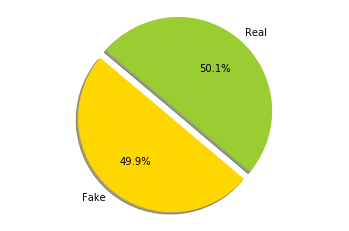

In [10]:
# Data to plot
labels = 'Fake', 'Real'
sizes = [counter0, counter1]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Input variable for dataframe:

1. id - DataType - int32 - This is not required for modelling so it can be dropped as it is not needed. 

2. title - DataType - string - This is required as the title can provide some information abot weather an article could be valid or not.

3. Author - DataType - string - This could also be beneficial as if the same author is responsible for multiple fake articles then it's highly likely that any article they've written is not true.

4. Text - DataType - string - This is important as the text is mainly going to be analysed by the models in order to predict weather that given article is true or false.

5. label - DataType - string - This column states weather the given article in the same row is true/false which is going to be used in modelling in training

## Data Cleaning

### Cleaning Title

In [11]:
bool_titlenull = data['title'].isnull()
NullTitleIndex = []
counter = -1
for item in bool_titlenull:
    counter = counter + 1
    if item == True:
        NullTitleIndex.append(counter)

In [12]:
objects = ('Null', 'Not Null')
y_pos = np.arange(len(objects))
performance = [len(NullTitleIndex), len(data['title']) - len(NullTitleIndex)]

Text(0.5, 1.0, 'Null vs Not Null Titles')

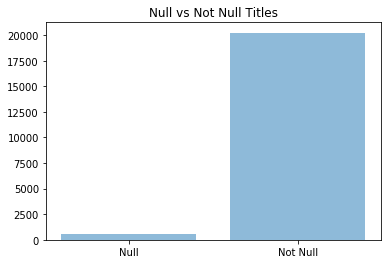

In [13]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Null vs Not Null Titles')

In [14]:
for index, row in data.iterrows():
    if index in NullTitleIndex:
        print(index, row)
        data = data.drop(index)
    else:
        continue

53 id                                                       53
title                                                   NaN
author                                          Dairy✓ᵀᴿᵁᴹᴾ
text      Sounds like he has our president pegged. What ...
label                                                     1
Name: 53, dtype: object
120 id                                                      120
title                                                   NaN
author                                            Anonymous
text      Same people all the time , i dont know how you...
label                                                     1
Name: 120, dtype: object
124 id                                                      124
title                                                   NaN
author                                    SeekSearchDestory
text      You know, outside of any morality arguments, i...
label                                                     1
Name: 124, dtype: object
140 id         

1942 id                                   1942
title                                 NaN
author                          jakespoon
text      Payday for the Devil's workmen.
label                                   1
Name: 1942, dtype: object
1974 id                                                     1974
title                                                   NaN
author                                            Anonymous
text      Same people all the time , i dont know how you...
label                                                     1
Name: 1974, dtype: object
1985 id                                1985
title                              NaN
author                          floosy
text      That brewed up well and good
label                                1
Name: 1985, dtype: object
2026 id                                                     2026
title                                                   NaN
author                         fundamentaly flawed humanity
text      troll…i

2854 id                                        2854
title                                      NaN
author                        Andrew Schuricht
text      It’s 3446 KKK has killed in 86 years
label                                        1
Name: 2854, dtype: object
2860 id                                                     2860
title                                                   NaN
author                                            greenanon
text      I will be a camera and would like to know if t...
label                                                     1
Name: 2860, dtype: object
2868 id                                                     2868
title                                                   NaN
author                               FedUpWithWelfareStates
text      A more appropriate euphemism would be "Monkeys...
label                                                     1
Name: 2868, dtype: object
2877 id                                                     2877
title  

4765 id                                                     4765
title                                                   NaN
author                                       hivdatingsites
text      We need to know more about this virus. We can ...
label                                                     1
Name: 4765, dtype: object
4780 id                                                     4780
title                                                   NaN
author                                             Amy Bell
text      Obama and Hillary are all about deceit and lie...
label                                                     1
Name: 4780, dtype: object
4806 id                                                     4806
title                                                   NaN
author                                       Justin Sawchuk
text      hope he nukes the hell out of CHINA disgusting...
label                                                     1
Name: 4806, dtype: object
4830 id

6557 id                   6557
title                 NaN
author          Hy Feiber
text      Good guy.\n👍👍👍👍
label                   1
Name: 6557, dtype: object
6569 id                                                     6569
title                                                   NaN
author                                      Janet Davenport
text      I agree WB….that’s an awfully thin slice of ha...
label                                                     1
Name: 6569, dtype: object
6573 id                                                     6573
title                                                   NaN
author                                               Jethro
text      No problem. Hillary can just send in another a...
label                                                     1
Name: 6573, dtype: object
6640 id                                                     6640
title                                                   NaN
author                                              

8609 id                                                     8609
title                                                   NaN
author                                       Gary Clevenger
text      Welcome to the hyperbole hour>>>>Where rhetori...
label                                                     1
Name: 8609, dtype: object
8620 id                                                     8620
title                                                   NaN
author                                            Anonymous
text      Here is the problem . The USA constitution sta...
label                                                     1
Name: 8620, dtype: object
8630 id                                                     8630
title                                                   NaN
author                                                  Mae
text      Well, duh. Wheat is no longer wheat, but a gmo...
label                                                     1
Name: 8630, dtype: object
8634 id

10450 id                                                    10450
title                                                   NaN
author                                            gregga777
text      It looks like the Kornet hit the turret bustle...
label                                                     1
Name: 10450, dtype: object
10509 id                                                    10509
title                                                   NaN
author                                            Jeannette
text      Hey Anon Void, I’m woman enough to admit when ...
label                                                     1
Name: 10509, dtype: object
10512 id                                                    10512
title                                                   NaN
author                                         James Blythe
text      What, if anything, is the Congress doing to st...
label                                                     1
Name: 10512, dtype: object
1

11410 id                                                    11410
title                                                   NaN
author                                       parum imperium
text      Poor little Duterte. He's so butthurt because ...
label                                                     1
Name: 11410, dtype: object
11424 id                                                    11424
title                                                   NaN
author                                              noclist
text      Israel should bulldoze it and replace it with ...
label                                                     1
Name: 11424, dtype: object
11433 id                                                    11433
title                                                   NaN
author                                               KD7ONE
text      Parts 7 & 8 CONSTANTINE AND THE CROSS & THE RE...
label                                                     1
Name: 11433, dtype: object
1

13364 id                                                    13364
title                                                   NaN
author                                     Joel Ross Taylor
text      When you say 'the server' Obama didn't know ex...
label                                                     1
Name: 13364, dtype: object
13440 id                          13440
title                         NaN
author                harry begby
text      my mums fitter than her
label                           1
Name: 13440, dtype: object
13471 id                                                    13471
title                                                   NaN
author                                           rickroland
text      They can "ignore" all they want, but they cann...
label                                                     1
Name: 13471, dtype: object
13473 id                                                    13473
title                                                   NaN
autho

15605 id                                                    15605
title                                                   NaN
author                                             A. Maren
text      Right. Starting with a war against Syria. Hill...
label                                                     1
Name: 15605, dtype: object
15701 id                                                    15701
title                                                   NaN
author                               FedUpWithWelfareStates
text      Going to be fun watching the Philippine's turn...
label                                                     1
Name: 15701, dtype: object
15708 id                                                    15708
title                                                   NaN
author                                                 Stan
text      In 100 years let me know how well tolerance wo...
label                                                     1
Name: 15708, dtype: object
1

16790 id                                                    16790
title                                                   NaN
author                                            Lyn Leahz
text      Yes, but the problem is, they don’t work. I ha...
label                                                     1
Name: 16790, dtype: object
16866 id                                                    16866
title                                                   NaN
author                                            Anonymous
text      yOU HAVE TO DRAW THE LINE SOMEWHERE AND CHILD ...
label                                                     1
Name: 16866, dtype: object
16917 id                                                    16917
title                                                   NaN
author                                               Jethro
text      Its a sad day when they have no more aloha sna...
label                                                     1
Name: 16917, dtype: object
1

17698 id                                                    17698
title                                                   NaN
author                                             YHC-FTSE
text      Would have been more ironic if that had been a...
label                                                     1
Name: 17698, dtype: object
17780 id                                                    17780
title                                                   NaN
author                                            Anonymous
text      The second video (bottom one ) proves what Tru...
label                                                     1
Name: 17780, dtype: object
17881 id                                                    17881
title                                                   NaN
author                                    Vincent Taliercio
text      Another suggestion would have an independent m...
label                                                     1
Name: 17881, dtype: object
1

18911 id                                                    18911
title                                                   NaN
author                            Karin Zakrzewski-Graziano
text      More cover ups and lies! I do not trust any of...
label                                                     1
Name: 18911, dtype: object
18970 id                                                    18970
title                                                   NaN
author                                           Brian Bell
text      I don't think any different than I did before ...
label                                                     1
Name: 18970, dtype: object
19028 id                   19028
title                  NaN
author             1980XLS
text      Stock "On Fire!"
label                    1
Name: 19028, dtype: object
19051 id                                                    19051
title                                                   NaN
author                                  

19770 id                                                    19770
title                                                   NaN
author                                                ACT I
text      If “Peaceful Uprising [is] a climate justice g...
label                                                     1
Name: 19770, dtype: object
19803 id                                                    19803
title                                                   NaN
author                                         Joseph Olson
text      &quot;Virginia Roberts Affidavit&quot; a teen ...
label                                                     1
Name: 19803, dtype: object
19811 id                                                    19811
title                                                   NaN
author                                              curriec
text      The statistic that Obamacare plan premiums are...
label                                                     1
Name: 19811, dtype: object
1

In [15]:
data.reset_index(drop=True, inplace=True)

In [16]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20237,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20238,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20239,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20240,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


### Cleaning Author

In [17]:
Bool_Authornull = data['author'].isnull()
NullAuthorIndex = []
counter = -1
for item in Bool_Authornull:
    counter = counter + 1
    if item == True:
        NullAuthorIndex.append(counter)

In [18]:
data[75:76]

,id,title,author,text,label
75,76,News: PR Disaster: The President Of Panasonic ...,NaN,Email \nGet ready for the most cringeworthy st...,1


In [19]:
objects = ('Null', 'Not Null')
y_pos = np.arange(len(objects))
performance = [len(NullAuthorIndex), len(data['author']) - len(NullAuthorIndex)]

Text(0.5, 1.0, 'Null vs Not Null Author')

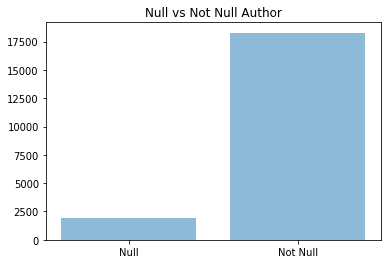

In [20]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Null vs Not Null Author')

In [21]:
for index, row in data.iterrows():
    if index in NullAuthorIndex:
        print(index, row)
        data = data.drop(index)
    else:
        continue

6 id                                                        6
title     Life: Life Of Luxury: Elton John’s 6 Favorite ...
author                                                  NaN
text      Ever wonder how Britain’s most iconic pop pian...
label                                                     1
Name: 6, dtype: object
8 id                                                        8
title     Excerpts From a Draft Script for Donald Trump’...
author                                                  NaN
text      Donald J. Trump is scheduled to make a highly ...
label                                                     0
Name: 8, dtype: object
20 id                                                       20
title     News: Hope For The GOP: A Nude Paul Ryan Has J...
author                                                  NaN
text      Email \nSince Donald Trump entered the electio...
label                                                     1
Name: 20, dtype: object
23 id                  

315 id                                                      322
title        Sparks Fly as Bikers for Trump Meet Protesters
author                                                  NaN
text      Home / News / Sparks Fly as Bikers for Trump M...
label                                                     1
Name: 315, dtype: object
341 id                                                      348
title     Another powerful earthquake strikes central Italy
author                                                  NaN
text      Another powerful earthquake strikes central It...
label                                                     1
Name: 341, dtype: object
354 id                                                      361
title     How NATO Is Trying to Sabotage the Turkey-Russ...
author                                                  NaN
text      Citizen journalism with a punch How NATO Is Tr...
label                                                     1
Name: 354, dtype: object
356 id       

633 id                                                      647
title     US Supreme Court justice groped female lawyer ...
author                                                  NaN
text      Society US Supreme Court Justice Clarence Thom...
label                                                     1
Name: 633, dtype: object
637 id                                                      651
title     The Crisis of the European Union Is Irreversib...
author                                                  NaN
text      Taming the corporate media beast The Crisis of...
label                                                     1
Name: 637, dtype: object
638 id                                                      652
title     Meet the Neocons, 9/11 Criminals and Goldman B...
author                                                  NaN
text      Corbett • 11/12/2016 • 20 Comments \nThe votin...
label                                                     1
Name: 638, dtype: object
660 id       

1115 id                                                     1148
title     Gay man finds it in himself to tolerate religi...
author                                                  NaN
text      Gay man finds it in himself to tolerate religi...
label                                                     1
Name: 1115, dtype: object
1122 id                                                     1156
title        Saudi’s threaten OPEC oil freeze over Iran row
author                                                  NaN
text      Saudi’s threaten OPEC oil freeze over Iran row...
label                                                     1
Name: 1122, dtype: object
1130 id                                                     1164
title           Life: 10 Steps To Rolling The Perfect Joint
author                                                  NaN
text      10 Steps To Rolling The Perfect Joint Posted t...
label                                                     1
Name: 1130, dtype: object
1134 id

1464 id                                                     1507
title     PressTV-Hezbollah shares Aoun’s victory: Leban...
author                                                  NaN
text      Lebanon Lebanese Foreign Minister Gebran Bassi...
label                                                     1
Name: 1464, dtype: object
1470 id                                                     1513
title     Venezuela Begins Printing Large-Denomination B...
author                                                  NaN
text      Get short URL 0 4 0 0 Inflation forced the Ven...
label                                                     1
Name: 1470, dtype: object
1486 id                                                     1529
title     "Dont Criticize what you cannot Understand" Mr...
author                                                  NaN
text      November 20, 2016 | Viral Videos | 1.8k SHARES...
label                                                     1
Name: 1486, dtype: object
1493 id

1793 id                                                     1840
title     Man whose job it was to rig US Presidential el...
author                                                  NaN
text      Wednesday 9 November 2016 Man whose job it was...
label                                                     1
Name: 1793, dtype: object
1799 id                                                     1846
title                          ObamaCare: Things Fall Apart
author                                                  NaN
text      Headlined to H3 10/26/16 - Advertisement - \nT...
label                                                     1
Name: 1799, dtype: object
1805 id                                                     1852
title     Юный житель Стерлитамака спас жизнь выпавшей и...
author                                                  NaN
text        \nЮный житель поселка Строймаш Ярослав Адонь...
label                                                     1
Name: 1805, dtype: object
1812 id

2171 id                                                     2229
title     Witness identifies one of key suspects as buye...
author                                                  NaN
text      This post was originally published on this sit...
label                                                     1
Name: 2171, dtype: object
2180 id                                                     2238
title     Nigel Farage held at Heathrow on return from T...
author                                                  NaN
text      Monday 14 November 2016 by Benedict Farkerhaus...
label                                                     1
Name: 2180, dtype: object
2190 id                                                     2248
title         Tom Hayden: Things Come Around in the Mideast
author                                                  NaN
text      By Padishah , July 23, 2006 at 12:19 am Link t...
label                                                     1
Name: 2190, dtype: object
2193 id

2638 id                                                     2713
title                         Trump Said It Would Be Rigged
author                                                  NaN
text      Thursday, 10 November 2016 Don't ask me how I ...
label                                                     1
Name: 2638, dtype: object
2640 id                                                     2715
title     US support emboldens Israel to defy intl. law:...
author                                                  NaN
text      Interviews A Palestinian woman searches throug...
label                                                     1
Name: 2640, dtype: object
2648 id                                                     2723
title     Slovenia Attractions: Know More About Melania ...
author                                                  NaN
text      Comment \nMelania Trump may have made her home...
label                                                     1
Name: 2648, dtype: object
2662 id

2999 id                                                     3084
title     Duterte Pulls a 180: China to Build Fake Islan...
author                                                  NaN
text      Duterte Pulls a 180: China to Build Fake Islan...
label                                                     1
Name: 2999, dtype: object
3008 id                                                     3093
title     Iceland’s Pirate Party Makes Strong Showing in...
author                                                  NaN
text      Iceland’s Pirate Party Makes Strong Showing in...
label                                                     1
Name: 3008, dtype: object
3013 id                                                     3098
title     Secret talks between Mozambique opposition, EU...
author                                                  NaN
text      More The file photo shows former rebel Renamo ...
label                                                     1
Name: 3013, dtype: object
3027 id

3312 id                                                     3407
title       Now Malaysia Dumps US for Chinese Naval Vessels
author                                                  NaN
text      Now Malaysia Dumps US for Chinese Naval Vessel...
label                                                     1
Name: 3312, dtype: object
3321 id                                                     3416
title     Insider Leaks Bill’s 2-Word Nickname For Hilla...
author                                                  NaN
text      Email \n\nNo wonder Bill went elsewhere to ful...
label                                                     1
Name: 3321, dtype: object
3327 id                                                     3422
title     TRUNEWS 10/26/16 Jeremy Wiles | Sing A Little ...
author                                                  NaN
text      TRUNEWS 10/26/16 Jeremy Wiles |   October 26, ...
label                                                     1
Name: 3327, dtype: object
3331 id

3656 id                                                     3756
title     DPR special services arrest members of group w...
author                                                  NaN
text      This post was originally published on this sit...
label                                                     1
Name: 3656, dtype: object
3657 id                                                     3757
title                   Miss Russia | Russia & India Report
author                                                  NaN
text      Miss Russia AFP/East News \nMiss Russia Alisa ...
label                                                     1
Name: 3657, dtype: object
3658 id                                                     3758
title     Media Claim Trump Transition Chaos. Trump's Wa...
author                                                  NaN
text      Media Claim Trump Transition Chaos. Trump's Wa...
label                                                     1
Name: 3658, dtype: object
3677 id

4174 id                                           4288
title     Hillary Clinton en 5 dates >> Le Gorafi
author                                        NaN
text                                          NaN
label                                           1
Name: 4174, dtype: object
4190 id                                                     4305
title     Clintons Are Under Multiple FBI Investigations...
author                                                  NaN
text      Clintons Are Under Multiple FBI Investigations...
label                                                     1
Name: 4190, dtype: object
4192 id                                                     4307
title     Trump Will Prove Bill Clinton Was Jack the Ripper
author                                                  NaN
text      Tuesday, 1 November 2016 Back in those days, B...
label                                                     1
Name: 4192, dtype: object
4193 id                                                  

4671 id                                                     4805
title     Truthdigger of the Week: Standing Rock Sioux C...
author                                                  NaN
text      Truthdigger of the Week: Standing Rock Sioux C...
label                                                     1
Name: 4671, dtype: object
4704 id                                                     4840
title     Dreaming Beyond Capitalism: a Culture Without ...
author                                                  NaN
text      By Martin Winiecki / kosmosjournal.org \nIn th...
label                                                     1
Name: 4704, dtype: object
4711 id                                                     4848
title     Clinton Claims US Voters to Reject Trump's ‘Di...
author                                                  NaN
text      0 4 0 1 Americans will not vote for Republican...
label                                                     1
Name: 4711, dtype: object
4712 id

5092 id                                                     5239
title     Text of F.B.I. Director’s Remarks on Investiga...
author                                                  NaN
text      Following is the prepared text of remarks by D...
label                                                     0
Name: 5092, dtype: object
5094 id                                                     5241
title     Chris Hedges and Tavis Smiley Discuss Popular ...
author                                                  NaN
text      Chris Hedges and Tavis Smiley Discuss Popular ...
label                                                     1
Name: 5094, dtype: object
5104 id                                                     5251
title     Crimea and Ukraine Fight a War Over Historical...
author                                                  NaN
text      Originally appeared at Irrussianality \nFollow...
label                                                     1
Name: 5104, dtype: object
5110 id

5432 id                                                     5585
title     Политизация проблемы терроризма на саммите БРИ...
author                                                  NaN
text      Регион: Южная Азия Борьба с терроризмом станов...
label                                                     1
Name: 5432, dtype: object
5450 id                                                     5603
title     Battle Over Dakota Access Pipeline Should Be t...
author                                                  NaN
text      Battle Over Dakota Access Pipeline Should Be t...
label                                                     1
Name: 5450, dtype: object
5452 id                                                     5605
title     The Politics of Death: Cancer and Politics, a ...
author                                                  NaN
text      License DMCA This is not about how politics co...
label                                                     1
Name: 5452, dtype: object
5455 id

5888 id                                                     6051
title     In A Bizarre Twist, Jill Stein Could Give The ...
author                                                  NaN
text      Share on Facebook \nOn Tuesday, researchers an...
label                                                     1
Name: 5888, dtype: object
5894 id                                                     6057
title     What happens when the government and the media...
author                                                  NaN
text      1 \nWhat happens when the government and the m...
label                                                     1
Name: 5894, dtype: object
5914 id                                                     6077
title     Cleveland Indians Rattled By Deafening Sound O...
author                                                  NaN
text      Cleveland Indians Rattled By Deafening Sound O...
label                                                     1
Name: 5914, dtype: object
5926 id

6358 id                                                     6542
title     The Dark Agenda Behind Globalism And Open Borders
author                                                  NaN
text      The Dark Agenda Behind Globalism And Open Bord...
label                                                     1
Name: 6358, dtype: object
6359 id                                                     6543
title     Fun, Safe Trick-Or-Treating Alternatives - The...
author                                                  NaN
text      Report: Friend Has Been Going By Middle Name T...
label                                                     1
Name: 6359, dtype: object
6367 id                                                     6551
title              I was actually born in Kenya, says Obama
author                                                  NaN
text      I was actually born in Kenya, says Obama 09-11...
label                                                     1
Name: 6367, dtype: object
6380 id

6784 id                                                     6977
title     Continuing Email Flap Won't Derail Clinton, Bu...
author                                                  NaN
text      Headlined to H3 10/28/16 - Advertisement - \nG...
label                                                     1
Name: 6784, dtype: object
6825 id                                                     7018
title     Turkish Gov't Decree Causes Major Police Chief...
author                                                  NaN
text      Military Coup Attempt in Turkey ( 352 ) 0 10 0...
label                                                     1
Name: 6825, dtype: object
6839 id                                                     7032
title     Reactions to the Supreme Court Ruling on Texas...
author                                                  NaN
text      In a major abortion ruling Monday, the Supreme...
label                                                     0
Name: 6839, dtype: object
6841 id

7252 id                                                     7457
title     Harry Reid Looks Forward to Retirement and "Ea...
author                                                  NaN
text        \nOutgoing senator Harry Reid says he can't ...
label                                                     1
Name: 7252, dtype: object
7255 id                                                     7460
title     Houthi-Saleh Alliance Takes Control over More ...
author                                                  NaN
text      This post was originally published on this sit...
label                                                     1
Name: 7255, dtype: object
7270 id                                                     7475
title     Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...
author                                                  NaN
text      November 13, 2016 By 21wire Leave a Comment \n...
label                                                     1
Name: 7270, dtype: object
7271 id

7663 id                                                     7879
title              Trump victory: A new political awakening
author                                                  NaN
text      Trump victory: A new political awakening 09.11...
label                                                     1
Name: 7663, dtype: object
7700 id                                                     7916
title     UAE welcomes UN peace plan to end crisis in Yemen
author                                                  NaN
text      Yemen UAE Minister of State for Foreign Affair...
label                                                     1
Name: 7700, dtype: object
7708 id                                                     7924
title     Britain hopeful that Trump presidency and fall...
author                                                  NaN
text      Wednesday 9 November 2016 By Jojo Britain hope...
label                                                     1
Name: 7708, dtype: object
7737 id

8110 id                                                     8335
title     New Reports Link Russia With Donald Trump’s Ca...
author                                                  NaN
text      New Reports Link Russia With Donald Trump’s Ca...
label                                                     1
Name: 8110, dtype: object
8111 id                                                     8336
title     Dakota Access Pipeline: Environmental Destruct...
author                                                  NaN
text      Juice News Thu, 27 Oct 2016 14:46 UTC The Dako...
label                                                     1
Name: 8111, dtype: object
8140 id                                                     8365
title     Meteor Or Alien Ship? Mystery Surrounds Bright...
author                                                  NaN
text      Meteor Or Alien Ship? Mystery Surrounds Bright...
label                                                     1
Name: 8140, dtype: object
8158 id

8532 id                                                     8773
title                  Fifty interesting facts about Russia
author                                                  NaN
text      Fifty interesting facts about Russia 31.10.201...
label                                                     1
Name: 8532, dtype: object
8540 id                                                     8782
title     According to activity on Facebook Donald Trump...
author                                                  NaN
text      « Previous - Next » According to activity on F...
label                                                     1
Name: 8540, dtype: object
8546 id                                                     8788
title     Busted: Bill Recorded Telling Mistress To Deny...
author                                                  NaN
text      Email \n\nFormer President Bill Clinton can be...
label                                                     1
Name: 8546, dtype: object
8561 id

8976 id                                                     9230
title     WHAT? Some Cities Are Now Pushing For Noncitiz...
author                                                  NaN
text      WHAT? Some Cities Are Now Pushing For Noncitiz...
label                                                     1
Name: 8976, dtype: object
8977 id                                                     9231
title     Selected Articles: Trump, the “Alt-right”, and...
author                                                  NaN
text      \nBy Peter Koenig , November 15 2016 \nThe ele...
label                                                     1
Name: 8977, dtype: object
8992 id                                                     9246
title     Politics, Soul Ages And The Bifurcation Of Wor...
author                                                  NaN
text      By In5D on November 15, 2016 in Awareness , Sp...
label                                                     1
Name: 8992, dtype: object
9022 id

9345 id                                                     9607
title     What the WikiLeak Revelations Reveal About Don...
author                                                  NaN
text      What the WikiLeak Revelations Reveal About Don...
label                                                     1
Name: 9345, dtype: object
9357 id                                                     9619
title     U.S. calls for special Intermediate-range Nucl...
author                                                  NaN
text      Thu, 27 Oct 2016 15:29 UTC The United States h...
label                                                     1
Name: 9357, dtype: object
9364 id                                                     9627
title     Down the memory hole: Ukraine's delusional pol...
author                                                  NaN
text      Wed, 26 Oct 2016 20:10 UTC © Peter / Sputnik S...
label                                                     1
Name: 9364, dtype: object
9385 id

9770 id                                                    10045
title     Wayne Allen Root “It’s Trump or it’s the End o...
author                                                  NaN
text      \nBy Wayne Allen Root – Review Journal \nThe e...
label                                                     1
Name: 9770, dtype: object
9775 id                                                    10051
title     Mutiny at the Fbi: Comey warned by his own age...
author                                                  NaN
text      MUTINY AT THE FBI: Comey warned by his own age...
label                                                     1
Name: 9775, dtype: object
9777 id                                                    10053
title     Anthony Weiner-Huma Abedin Marriage Is Like th...
author                                                  NaN
text      [MORE] by Gaius Publius\nSummary first: We hav...
label                                                     1
Name: 9777, dtype: object
9779 id

10185 id                                                    10470
title     UK Teenager Charged After Terror Alert in Lond...
author                                                  NaN
text      Get short URL 0 1 0 0 A 19-year-old was charge...
label                                                     1
Name: 10185, dtype: object
10193 id                                                    10478
title     World’s Largest Space Telescope Set To Launch ...
author                                                  NaN
text      Clinton Staff Readies EMP Launch To Disable Al...
label                                                     1
Name: 10193, dtype: object
10194 id                                                    10479
title     Millions Gather Under Times Square Countdown C...
author                                                  NaN
text      More Election Coverage Millions Gather Under T...
label                                                     1
Name: 10194, dtype: object
1

10644 id                                                    10944
title                  FOR SALE: Hillary's State Department
author                                                  NaN
text      Home / News / FOR SALE: Hillary’s State Depart...
label                                                     1
Name: 10644, dtype: object
10647 id                                                    10947
title                           Thanksgiving Secret Door II
author                                                  NaN
text        Thanksgiving Secret Door II Thanksgiving Sec...
label                                                     1
Name: 10647, dtype: object
10668 id                                                    10968
title     Michelle Obama - next president after Donald T...
author                                                  NaN
text      AP photo Many social networkers urge Michelle ...
label                                                     1
Name: 10668, dtype: object
1

11188 id                                                    11501
title                      Quiz: How Haunted Is Your House?
author                                                  NaN
text      How Haunted Is Your House? Posted today Do you...
label                                                     1
Name: 11188, dtype: object
11216 id                                                    11530
title                Paul Craig Roberts - Official Homepage
author                                                  NaN
text      Contact Dear friends and readers, \nPCR's new ...
label                                                     1
Name: 11216, dtype: object
11230 id                                                    11544
title     Obi-Wan Kenobi reports great disturbance in th...
author                                                  NaN
text      Wednesday 9 November 2016 by Davywavy Obi-Wan ...
label                                                     1
Name: 11230, dtype: object
1

11719 id                                                    12046
title              Gold prices on the way to all-time highs
author                                                  NaN
text      Font Size "What does the rising gold price mea...
label                                                     1
Name: 11719, dtype: object
11722 id                                                    12049
title     Australian taxpayers charged over $88 million ...
author                                                  NaN
text      Australian taxpayers charged over $88 million ...
label                                                     1
Name: 11722, dtype: object
11723 id                                                    12050
title                             What Keeps the F-35 Alive
author                                                  NaN
text      What Keeps the F-35 Alive   David Swanson \nIm...
label                                                     1
Name: 11723, dtype: object
1

12203 id                                                    12543
title     6 neo-Nazis arrested in Motorola assassination...
author                                                  NaN
text      6 neo-Nazis arrested in Motorola assassination...
label                                                     1
Name: 12203, dtype: object
12210 id                                                    12551
title     Cloud-resembling animal from the apocalypse ac...
author                                                  NaN
text      Cloud-resembling animal from the apocalypse ac...
label                                                     1
Name: 12210, dtype: object
12222 id                                                    12563
title     President Obama’s 2013 Golf Trip With Tiger Wo...
author                                                  NaN
text      President Obama’s 2013 Golf Trip With Tiger Wo...
label                                                     1
Name: 12222, dtype: object
1

12584 id                                                    12930
title     Rajoy anuncia el inicio de una "nueva etapa po...
author                                                  NaN
text      (actualizada a las 21:34 26.10.2016) URL corto...
label                                                     1
Name: 12584, dtype: object
12603 id                                                    12949
title             Overcoming Anxiety/ Spirit Communications
author                                                  NaN
text        Overcoming Anxiety/ Spirit Communications Ov...
label                                                     1
Name: 12603, dtype: object
12607 id                                                    12953
title     Anti-Trump Protester Holds Reprehensible Sign ...
author                                                  NaN
text      Anti-Trump Protester Holds Reprehensible Sign ...
label                                                     1
Name: 12607, dtype: object
1

12959 id                                                    13309
title        Russia strikes with its new hypersonic missile
author                                                  NaN
text      Russia strikes with its new hypersonic missile...
label                                                     1
Name: 12959, dtype: object
12965 id                                                    13315
title     Eric Bolling Just Exposed Hillary’s TERROR TIE...
author                                                  NaN
text      \nThe newest batch of emails released from Wik...
label                                                     1
Name: 12965, dtype: object
12974 id                                                    13326
title     Inside The Invisible Government: War, Propagan...
author                                                  NaN
text      License DMCA The American journalist, Edward B...
label                                                     1
Name: 12974, dtype: object
1

13362 id                                                    13729
title     Daesh returnees from Syria could launch chemic...
author                                                  NaN
text      This post was originally published on this sit...
label                                                     1
Name: 13362, dtype: object
13376 id                                                    13743
title     World Markets Rally with Glee After Hillary Em...
author                                                  NaN
text      World Markets Rally with Glee After Hillary Em...
label                                                     1
Name: 13376, dtype: object
13383 id                                                    13750
title     7 Things You Need To Know About Trump Attorney...
author                                                  NaN
text      7 Things You Need To Know About Trump Attorney...
label                                                     1
Name: 13383, dtype: object
1

13699 id                                                    14074
title                          Election 2016 Endgame: Vote!
author                                                  NaN
text      License DMCA We're getting down to the wire. I...
label                                                     1
Name: 13699, dtype: object
13702 id                                                    14077
title                  Asda shoppers ‘just generally angry’
author                                                  NaN
text      Asda shoppers ‘just generally angry’ 31-10-16 ...
label                                                     1
Name: 13702, dtype: object
13707 id                                                    14082
title     Russian couple’s firm making the world a littl...
author                                                  NaN
text      This post was originally published on this sit...
label                                                     1
Name: 13707, dtype: object
1

14239 id                                                    14627
title     Report: Election Day Most Americans’ Only Time...
author                                                  NaN
text      Hillary Clinton Waiting In Wings Of Stage Sinc...
label                                                     1
Name: 14239, dtype: object
14248 id                                                    14636
title     Президент Путин ответил на критику Запада по п...
author                                                  NaN
text      0 комментариев 14 поделились Фото: kremlin.ru ...
label                                                     1
Name: 14248, dtype: object
14257 id                                                    14645
title     Donald Trump Elected President - The Onion - A...
author                                                  NaN
text      Vol 52 Issue 44 · Opinion \nAfter the tightest...
label                                                     1
Name: 14257, dtype: object
1

14611 id                                                    15005
title     ID Clinic Handing Out Free Chastity Belts | Go...
author                                                  NaN
text      Tweet \nINDIANAPOLIS, IN – An infectious disea...
label                                                     1
Name: 14611, dtype: object
14627 id                                                    15023
title          Truth about Mosul to emerge at mass funerals
author                                                  NaN
text      Truth about Mosul to emerge at mass funerals 0...
label                                                     1
Name: 14627, dtype: object
14637 id                                                    15034
title     Daesh executing civilians as Iraqi forces advance
author                                                  NaN
text      Iraq Federal police forces launch a rocket dur...
label                                                     1
Name: 14637, dtype: object
1

15053 id                                                    15456
title     I dare you to restrain yourself from laughing ...
author                                                  NaN
text      I dare you to restrain yourself from laughing ...
label                                                     1
Name: 15053, dtype: object
15055 id                                                    15458
title     DAMNING Clinton Footage Leaks DAYS Before Elec...
author                                                  NaN
text      Comments \nThroughout this election, Hillary C...
label                                                     1
Name: 15055, dtype: object
15058 id                                                    15461
title     The U.S. Revolution is Underway - Hillary Clin...
author                                                  NaN
text      The U.S. Revolution is Underway - Hillary Clin...
label                                                     1
Name: 15058, dtype: object
1

15447 id                                                    15860
title     11 Stupid Things Vox.com's Matthew Yglesias Ha...
author                                                  NaN
text      11 Stupid Things Vox.com's Matthew Yglesias Ha...
label                                                     1
Name: 15447, dtype: object
15454 id                                                    15867
title     Russia Has Been Reading the Art of War - Blake...
author                                                  NaN
text        The National Interest \nLast week, the New Y...
label                                                     1
Name: 15454, dtype: object
15459 id                                                    15872
title     FEAR OF TRUMP: BUSH, OBAMA, CLINTON ALL BUYING...
author                                                  NaN
text      Email \n\nIt appears Bill and Hillary Clinton ...
label                                                     1
Name: 15459, dtype: object
1

15955 id                                                    16379
title        Russia outstrips USA in anti-meteorite defence
author                                                  NaN
text      Russia outstrips USA in anti-meteorite defence...
label                                                     1
Name: 15955, dtype: object
15964 id                                                    16388
title     Endangered animals ‘guilty of poor financial p...
author                                                  NaN
text      Endangered animals ‘guilty of poor financial p...
label                                                     1
Name: 15964, dtype: object
15965 id                                                    16389
title     Nadejda Savtchenko revient à Moscou. Dans quel...
author                                                  NaN
text      (mis à jour 19:05 26.10.2016) URL courte 15 20...
label                                                     1
Name: 15965, dtype: object
1

16369 id                                                    16806
title     THIS IS COMEY’S LAST CHANCE FOR REDEMPTION – T...
author                                                  NaN
text      THIS IS COMEY’S LAST CHANCE FOR REDEMPTION THI...
label                                                     1
Name: 16369, dtype: object
16378 id                                                    16815
title     The Failure of Democracy -- How The Oligarchs ...
author                                                  NaN
text      License DMCA \nI am now convinced that the Oli...
label                                                     1
Name: 16378, dtype: object
16379 id                                                    16816
title     British pride restored by grovelling to Japane...
author                                                  NaN
text      British pride restored by grovelling to Japane...
label                                                     1
Name: 16379, dtype: object
1

16868 id                                                    17318
title     Christie Lost Republicans The 2012 Election. H...
author                                                  NaN
text      Christie Lost Republicans The 2012 Election. H...
label                                                     1
Name: 16868, dtype: object
16874 id                                                    17324
title     PressTV-Americans ‘repudiated Clinton foreign ...
author                                                  NaN
text      Interviews US Democratic presidential nominee ...
label                                                     1
Name: 16874, dtype: object
16875 id                                                    17325
title     New Bulgakov museum to open in Moscow - Russia...
author                                                  NaN
text      This post was originally published on this sit...
label                                                     1
Name: 16875, dtype: object
1

17368 id                                                    17837
title     At the Tonys, Moments to Remember - The New Yo...
author                                                  NaN
text      In a Tony Awards night shadowed by the tragedy...
label                                                     0
Name: 17368, dtype: object
17370 id                                                    17839
title     Скандал вокруг Пак Кын Хе и Чхве Сун Силь и ма...
author                                                  NaN
text      Страна: Южная Корея Мы продолжаем информироват...
label                                                     1
Name: 17370, dtype: object
17386 id                                                    17855
title     Dakota Access Pipeline Protesters Maced, Hit w...
author                                                  NaN
text      Dakota Access Pipeline Protesters Maced, Hit w...
label                                                     1
Name: 17386, dtype: object
1

17868 id                                                    18352
title     John Kirby and the US State Department Blatant...
author                                                  NaN
text      John Kirby and the US State Department Blatant...
label                                                     1
Name: 17868, dtype: object
17874 id                                                    18359
title     AIDS epidemic in Russia: 'Crocodile' addicts o...
author                                                  NaN
text      Print version Font Size The authorities of the...
label                                                     1
Name: 17874, dtype: object
17875 id                                                    18360
title     "Для Порошенко главные ветераны войны — бандер...
author                                                  NaN
text      0 комментариев 0 поделились Фото: АР \nВпервые...
label                                                     1
Name: 17875, dtype: object
1

18273 id                                                    18767
title     Strikes of the Syrian aircraft on the Al Nusra...
author                                                  NaN
text      Home » Strikes of the Syrian aircraft on the A...
label                                                     1
Name: 18273, dtype: object
18274 id                                                    18768
title          Hillary Friend Bribed FBI Agent and His Wife
author                                                  NaN
text      Email \n\nWSJ The political organization of Vi...
label                                                     1
Name: 18274, dtype: object
18284 id                                                    18779
title          Trump smiles, waves, starts rounding them up
author                                                  NaN
text      Trump smiles, waves, starts rounding them up 0...
label                                                     1
Name: 18284, dtype: object
1

18700 id                                                    19206
title     Four Simple Reasons Why the Global Elite Hate ...
author                                                  NaN
text      In our previous article The Secret Truth about...
label                                                     1
Name: 18700, dtype: object
18713 id                                                    19219
title     Queen Elizabeth II owns every dolphin in Brita...
author                                                  NaN
text      Email \nQueen Elizabeth II is not like you and...
label                                                     1
Name: 18713, dtype: object
18721 id                                                    19227
title     Des millions d’Américains recherchent massivem...
author                                                  NaN
text                                                    NaN
label                                                     1
Name: 18721, dtype: object
1

19178 id                                                    19704
title        100 Notable Books of 2016 - The New York Times
author                                                  NaN
text      The year’s notable fiction, poetry and nonfict...
label                                                     0
Name: 19178, dtype: object
19179 id                                                    19705
title     Lessons of Syria: Russia to Form a 'Superlight...
author                                                  NaN
text      Politics Lessons of Syria: Russia to Form a 'S...
label                                                     1
Name: 19179, dtype: object
19180 id                                                    19706
title     If Clinton Campaign Believes WikiLeaks Emails ...
author                                                  NaN
text      Elections 2016 \nTop democrats have repeatedly...
label                                                     1
Name: 19180, dtype: object
1

19595 id                                                    20138
title     PressTV-NATO pushes military buildup plans nea...
author                                                  NaN
text      NATO pushes military buildup plans near Russia...
label                                                     1
Name: 19595, dtype: object
19598 id                                                    20141
title     Thomas Frank Explores Whether Hillary Clinton ...
author                                                  NaN
text                                                       
label                                                     1
Name: 19598, dtype: object
19605 id                                                    20148
title     Inside ‘Bill Clinton Inc.’: Hacked Memo Shows ...
author                                                  NaN
text      Inside ‘Bill Clinton Inc.’: Hacked Memo Shows ...
label                                                     1
Name: 19605, dtype: object
1

20115 id                                                    20671
title     13 Years Later Elizabeth Smart Realizes Kidnap...
author                                                  NaN
text       \nIn 2002, Elizabeth Smart was abducted durin...
label                                                     1
Name: 20115, dtype: object
20121 id                                                    20677
title     Europe Hopes for Clinton Win for More Deals Wi...
author                                                  NaN
text      Europe Hopes for Clinton Win for More Deals Wi...
label                                                     1
Name: 20121, dtype: object
20123 id                                                    20679
title     SNOWFLAKE: Colbert Didn’t Want To Write Jokes ...
author                                                  NaN
text      SNOWFLAKE: Colbert Didn’t Want To Write Jokes ...
label                                                     1
Name: 20123, dtype: object
2

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data['label'].dtypes

dtype('int64')

### Cleaning Text

In [24]:
NullTextIndex = []
for index, row in data.iterrows():
    if len(row['text']) < 5:
        print(index, row)
        NullTextIndex.append(index)
        data = data.drop(index)
    else:
        continue

71 id                                82
title     Huma’s Weiner Dogs Hillary
author                  Steve Sailer
text                                
label                              1
Name: 71, dtype: object
149 id                                                      169
title     Mohamad Khweis: Another “Virginia Man” (Palest...
author                                        James Fulford
text                                                       
label                                                     1
Name: 149, dtype: object
255 id                                                      295
title     A Connecticut Reader Reports Record Voter Regi...
author                                     VDARE.com Reader
text                                                       
label                                                     1
Name: 255, dtype: object
410 id                                                      470
title     BULLETIN: There ARE Righteous Jews For Trump!;...
author

6114 id                                                     6976
title     Ann Coulter–Our New Country: “Women And Minori...
author                                          Ann Coulter
text                                                       
label                                                     1
Name: 6114, dtype: object
6264 id                                                     7141
title     When I’m Mistakenly Put on an Email Chain, Sho...
author                                        Daniel Victor
text                                                    No.
label                                                     0
Name: 6264, dtype: object
7009 id                                                   7980
title     Would A Hillary Regime Be Presidency From Hell?
author                                Patrick J. Buchanan
text                                                     
label                                                   1
Name: 7009, dtype: object
7321 id          

14367 id                           16347
title     Trump’s Closing Argument
author                Steve Sailer
text                              
label                            1
Name: 14367, dtype: object
14550 id                                                    16561
title     Not sure what to do with your time now Bake Of...
author                           newsbiscuit editorial team
text                                                       
label                                                     1
Name: 14550, dtype: object
14686 id                                                    16715
title     Citizens Reject Forced Diversity Policy by Sup...
author                                        Brenda Walker
text                                                       
label                                                     1
Name: 14686, dtype: object
15310 id                                                    17417
title     A Catholic Reader Writes In Defense of “Nativi...


In [25]:
objects = ('Null', 'Not Null')
y_pos = np.arange(len(objects))
performance = [len(NullTextIndex), len(data['text']) - len(NullTextIndex)]

Text(0.5, 1.0, 'Null vs Not Null Text')

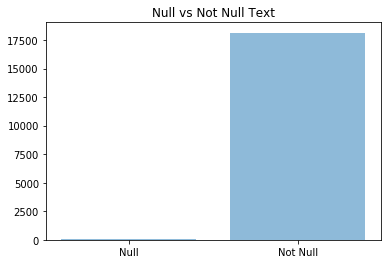

In [26]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Null vs Not Null Text')

### Removing Non English Articles

In [27]:
data.reset_index(drop=True,inplace=True)
%pip install langdetect 
from langdetect import detect

Note: you may need to restart the kernel to use updated packages.


In [28]:
data = data.drop(11389)
for index, row in data.iterrows():
    Text_Lang = detect(row['text'])
    if Text_Lang != 'en':
        data = data.drop(index)
    else:
        continue
data.reset_index(drop=True,inplace=True)

### Cleaning ID

In [29]:
data = data.drop(['id'], axis=1)

The reason for droppping the id column is because it doesn't help when it comes to modelling as the model tries to use the id numbers in the column to find a link to the given label output, which there isn't meaning it's best to remove the id column to increase the accuracy of the models in the latter stage.

### Cleaning Label

In [30]:
BoolLabelNull = data['label'].isnull()
NullLabelIndex = []
counter = -1
for item in BoolLabelNull:
    counter = counter + 1
    if item == True:
        NullLabelIndex.append(counter)
        print(counter)

In [31]:
print(len(NullLabelIndex))

0


In [32]:
objects = ('Null', 'Not Null')
y_pos = np.arange(len(objects))
performance = [len(NullLabelIndex), len(data['label']) - len(NullLabelIndex)]

Text(0.5, 1.0, 'Null vs Not Null Label')

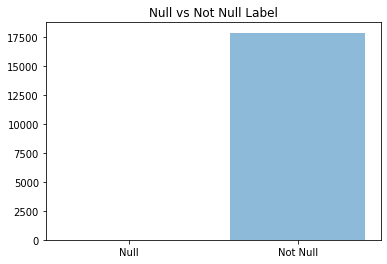

In [33]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Null vs Not Null Label')

#### Removing Strings from Label

In [34]:
data['label'].dtypes

dtype('int64')

This confirms that the column doesn't contain any other data type apart from integers

In [35]:
for index, row in data.iterrows():
    if row['label'] != 0 and row['label'] != 1:
        print(index, row)

CHECK WHETHER THE ITEMS IN LABEL IS A STRING OR NUMBER IF SO REMOVE THEM FROM THE DF

#### Dropping any other unfound rows which contain NAN

In [36]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [37]:
data

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
17889,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
17890,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
17891,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
17892,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In order to properly clean the text for the pre-processing stages the punctuation and tags and any URL's that remain in the title, text and author need to be removed. This is because these parts of the text have no meaning towards the outcome and instead increase the search space. By reducing the feature size we increase the likelihood of finding valuable connections and outputs when it comes to the modelling stage, compared to keeping the tags, URL's and punctuation in the text during the pre-processing stage.

### Removing Punctuation

In [38]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\idree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
text_string = ""
counter = -1

for index, row in data.iterrows():
    text_string = row['text']
    tokens = word_tokenize(text_string)
    words = [word for word in tokens if word.isalpha()]
    for word in words:
        counter = counter + 1
        if len(word) == 1:
            words[counter-1] = words[counter -1] + word
            del words[counter]
    TextNoPunc = ' '.join(words)
    row['text'] = " "
    row['text'] = TextNoPunc
    data['text'].iloc[index] = TextNoPunc  
    words.clear()
    text_string = ""
    counter = -1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Removing Punctuation from Title

In [40]:
text_string = ""
counter = -1

for index, row in data.iterrows():
    text_string = row['title']
    tokens = word_tokenize(text_string)
    words = [word for word in tokens if word.isalpha()]
    
    for word in words:
        counter = counter + 1
        if len(word) == 1:
            words[counter-1] = words[counter -1] + word
            del words[counter]
    TextNoPunc = ' '.join(words)
    row['title'] = " "
    row['title'] = TextNoPunc
    data['title'].iloc[index] = TextNoPunc  
    words.clear()
    text_string = ""
    counter = -1

#### Removing Punctuation from Author

In [41]:
text_string = ""
counter = -1

for index, row in data.iterrows():
    text_string = row['author']
    tokens = word_tokenize(text_string)
    words = [word for word in tokens if word.isalpha()]
    
    for word in words:
        counter = counter + 1
        if len(word) == 1:
            words[counter-1] = words[counter -1] + word
            del words[counter]
    TextNoPunc = ' '.join(words)
    row['author'] = " "
    row['author'] = TextNoPunc
    data['author'].iloc[index] = TextNoPunc  
    words.clear()
    text_string = ""
    counter = -1

In [42]:
import re

In [43]:
for i, row in data.iterrows():
    #Remove punctuations using regex which is calling a regex library
    #text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    text = data['text'][i]
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #Assign 'cleaned text' back to the dataframe
    data['text'][i] = text

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [44]:
for i, row in data.iterrows():
    #Remove punctuations using regex which is calling a regex library
    #text = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    text = data['title'][i]
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #Assign 'cleaned text' back to the dataframe
    data['title'][i] = text

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [45]:
for i, row in data.iterrows():
    #Remove punctuations using regex which is calling a regex library
    #text = re.sub('[^a-zA-Z]', ' ', data['author'][i])
    text = data['author'][i]
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #Assign 'cleaned text' back to the dataframe
    data['author'][i] = text

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Remove the stop words from the dataframe 

In [46]:
data

,title,author,text,label
0,house dem aide we didnt even see comeys letter...,darrell lucus,house dem aide we didnt even see comeys letter...,1
1,flynn hillary clinton big woman on campus brei...,daniel flynn,ever get the feeling your life circles the rou...,0
2,why the truth might get you fired,,why the truth might get you fired october the ...,1
3,civilians killed in single us airstrike have b...,jessica purkiss,videos civilians killed in single us airstrike...,1
4,iranian woman jailed for fictional unpublished...,howard portnoy,print an iranian woman has been sentenced to s...,1
...,...,...,...,...
17889,rapper trumpa poster child for white supremacy,jerome hudson,rapper unloaded on black celebrities who met w...,0
17890,playoffs schedule matchups and odds the new yo...,benjamin hoffman,when the green bay packers lost to the washing...,0
17891,macys is said to receive takeover approach by ...,michael de la merced and rachel abrams,the macys of today grew from the union of seve...,0
17892,nato russia to hold parallel exercises in balkans,alex ansary,nato russia to hold parallel exercises in balk...,1


In [47]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\idree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The next tile below shows the stop words that are being removed from the text column in the dataframe. The reason for removing these words is because they don't mean anything/add any value and instead leave words in the article which do. Not only this but stop words are very common in most un-cleaned text meaning they take up a lot of computational resources that could of otherwise been used on words in the corpus which meant something.

In [48]:
text = []
for index, row in data.iterrows():
    text = data['text'][index]
    text = text.split()
    text = [word for word in text if word in stopWords]

In [49]:
# Generating a word cloud for the stop words that have been removed from the text column
textString = ' '.join(text)
print(textString)

is an and he he is of and for he is on and is by the on in or no the now and ma ma in he at and and his are the and more and when the in from the of he has and with for for the and as for the of for now his and at and at is what the by on to by in your that was to have an of where the was and an for who this to have and and and most of this at the was to of then be just now if this same because it if the had to but them out of the of this we that if were not the that this and to into the for but if this is for of we ll with its we now what if this was to at over and what if that had to be from other more for the and the what if the was out of the of of for or that in some in those where the to of at what if this when of the what if this to do what was of it and to do what it was for those do not as as the is and then all is the m is the at you can by in where the is to be at that you ll of how the ve been is the the is to the and the of the the and from the and from the of and where th

When you have a bit of spare time get the wordcloud working to show the stop words that have been removed from the text column of the dataframe.

In [51]:
for index, row in data.iterrows():
    textRemoveSW = data['text'][index]
    textRemoveSW = textRemoveSW.split()
    textRemoveSW = [word for word in textRemoveSW if word not in stopWords]
    textRemoveSW = ' '.join(textRemoveSW)
    data['text'].iloc[index] = textRemoveSW  

Stemming vs Lemmetization. I have decided to chose lemmetization instead of stemming as stemming create non-real words whereas lemmetization finds the root of a word. This means lemmetization is better than stemming but it's a more computationally expensive process compared to lemmetization.

### Lemmetization

In [52]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\idree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
for index, row in data.iterrows():
    TextLem = data['text'][index]
    TextLem = lem.lemmatize(TextLem)
    data['text'].iloc[index] = TextLem

# Modelling

I belive the majority of the cleaning is complete especially for the text column as that is the main focus as it is the heart of the modelling. I intend to merge the title and text column together and maybe also the author.

TF-IDF - Term Frequency Inverse Document Frequency is a statistical approach used to find the weight of each induvidual word in the corpus. The weight is the measure of importance of each word within the corpus, which is directly proportional to the number of times the word is used in the document. But this is offset by the total number of words used in the corpus.
This text proccessing approach is very common amongst SEO's

### TF-IDF CLASSIFIER WITH NB

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [55]:
train_X = data['text']
train_y = data['label']

In [56]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [57]:
data = shuffle(data)
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=1) # 70% training and 30% test

In [58]:
tf_vectorizer = TfidfVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 12525, n_features: 131257


In [59]:
X_test_tf = tf_vectorizer.transform(X_test)

print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 5369, n_features: 131257


### Multinomial Naive Bayes - TF-IDF(word Level)

In [60]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
y_pred = naive_bayes_classifier.predict(X_test_tf)

score1 = metrics.accuracy_score(y_test, y_pred)

In [62]:
print("accuracy:   %0.3f" % score1)

accuracy:   0.761


In [63]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.71      1.00      0.83      3141
    Negative       0.99      0.43      0.60      2228

    accuracy                           0.76      5369
   macro avg       0.85      0.71      0.71      5369
weighted avg       0.83      0.76      0.73      5369

confusion matrix:
[[3134    7]
 [1274  954]]
------------------------------


In [64]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp = 0
tn = 0
fp = 0
fn = 0
for item in conusionNum:
    tp = conusionNum[0, 0]
    fp = conusionNum[0, 1]
    fn = conusionNum[1, 0]
    tn = conusionNum[1, 1]
total = tp + fp + fn + tn
print(((tp/total)*100),((fp/total)*100),((fn/total)*100),((tn/total)*100))
tp = tp/total*100
fp = fp/total*100
fn = fn/total*100
tn = tn/total*100

58.372136338238036 0.1303780964797914 23.728813559322035 17.76867200596014


In [65]:
tp_sensitivity = (tp/(tp+fn)) * 100
tn_sensitivity = (tn/(tn+fp)) * 100
fp_sensitivity = (fp/(fp+tn)) * 100
fn_sensitivity = (fn/(fn+tp)) * 100
print(tp_sensitivity, tn_sensitivity, fp_sensitivity, fn_sensitivity)

71.09800362976407 99.27159209157128 0.72840790842872 28.90199637023593


# Appying K-Fold Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = naive_bayes_classifier, X = X_train_tf, y = y_train, cv = 5)
accuracies.mean()

0.7313380561367188

### Logistic Regression on TF-IDF

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logReg = LogisticRegression(random_state=42)
logReg.fit(X_train_tf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred_logReg = logReg.predict(X_test_tf)

score2 = metrics.accuracy_score(y_test, y_pred_logReg)

In [70]:
print("accuracy:   %0.3f" % score2)

accuracy:   0.936


In [71]:
print(metrics.classification_report(y_test, y_pred_logReg, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_logReg))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.93      0.96      0.95      3141
    Negative       0.94      0.90      0.92      2228

    accuracy                           0.94      5369
   macro avg       0.94      0.93      0.93      5369
weighted avg       0.94      0.94      0.94      5369

confusion matrix:
[[3015  126]
 [ 219 2009]]
------------------------------


In [72]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_logReg)

tp1 = 0
tn1 = 0
fp1 = 0
fn1 = 0
for item in conusionNum:
    tp1 = conusionNum[0, 0]
    fp1 = conusionNum[0, 1]
    fn1 = conusionNum[1, 0]
    tn1 = conusionNum[1, 1]
total1 = tp1 + fp1 + fn1 + tn1
print(((tp1/total1)*100),((fp1/total1)*100),((fn1/total1)*100),((tn1/total1)*100))
tp1 = tp1/total1*100
fp1 = fp1/total1*100
fn1 = fn1/total1*100
tn1 = tn1/total1*100

56.155708698081575 2.346805736636245 4.078971875582045 37.41851368970013


In [73]:
tp_sensitivity1 = (tp1/(tp1+fn1)) * 100
tn_sensitivity1 = (tn1/(tn1+fp1)) * 100
fp_sensitivity1 = (fp1/(fp1+tn1)) * 100
fn_sensitivity1 = (fn1/(fn1+tp1)) * 100
print(tp_sensitivity1, tn_sensitivity1, fp_sensitivity1, fn_sensitivity1)

93.22820037105751 94.09836065573771 5.901639344262295 6.771799628942486


# Applying K-Fold Cross Validation

In [74]:
Accuracies_logReg1 = cross_val_score(estimator = logReg, X = X_train_tf, y = y_train, cv = 5)
Accuracies_logReg1.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9343709304654221

### Linear Support Vector Machine with TF-IDF

In [75]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train_tf, y_train)
y_pred = clf_svm.predict(X_test_tf) 

In [77]:
scoreSVM = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % scoreSVM)

accuracy:   0.950


In [78]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.96      0.96      0.96      3141
    Negative       0.94      0.94      0.94      2228

    accuracy                           0.95      5369
   macro avg       0.95      0.95      0.95      5369
weighted avg       0.95      0.95      0.95      5369

confusion matrix:
[[3013  128]
 [ 141 2087]]
------------------------------


In [79]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp2 = 0
tn2 = 0
fp2 = 0
fn2 = 0
for item in conusionNum:
    tp2 = conusionNum[0, 0]
    fp2 = conusionNum[0, 1]
    fn2 = conusionNum[1, 0]
    tn2 = conusionNum[1, 1]
total2 = tp2 + fp2 + fn2 + tn2
print(((tp2/total2)*100),((fp2/total2)*100),((fn2/total2)*100),((tn2/total2)*100))
tp2 = tp2/total2*100
fp2 = fp2/total2*100
fn2 = fn2/total2*100
tn2 = tn2/total2*100

56.11845781337307 2.3840566213447567 2.626187371950084 38.871298193332095


In [80]:
tp_sensitivity2 = (tp2/(tp2+fn2)) * 100
tn_sensitivity2 = (tn2/(tn2+fp2)) * 100
fp_sensitivity2 = (fp2/(fp2+tn2)) * 100
fn_sensitivity2 = (fn2/(fn2+tp2)) * 100
print(tp_sensitivity2, tn_sensitivity2, fp_sensitivity2, fn_sensitivity2)

95.52948636651871 94.22121896162528 5.778781038374717 4.4705136334812945


# Applying K-Fold Cross-Validation

In [81]:
Accuracies_clf_svm1 = cross_val_score(estimator = clf_svm, X = X_train_tf, y = y_train, cv = 5)
Accuracies_clf_svm1.mean()

0.9482629883900175

### Random Forrest Using TD-IDF

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
RandomForrest_TF = RandomForestClassifier()
RandomForrest_TF.fit(X_train_tf, y_train)
y_pred = RandomForrest_TF.predict(X_test_tf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [84]:
scoreRandomForrest = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % scoreRandomForrest)

accuracy:   0.834


In [85]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.81      0.95      0.87      3141
    Negative       0.90      0.68      0.77      2228

    accuracy                           0.83      5369
   macro avg       0.85      0.81      0.82      5369
weighted avg       0.84      0.83      0.83      5369

confusion matrix:
[[2971  170]
 [ 719 1509]]
------------------------------


In [86]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp3 = 0
tn3 = 0
fp3 = 0
fn3 = 0
for item in conusionNum:
    tp3 = conusionNum[0, 0]
    fp3 = conusionNum[0, 1]
    fn3 = conusionNum[1, 0]
    tn3 = conusionNum[1, 1]
total3 = tp3 + fp3 + fn3 + tn3
print(((tp3/total3)*100),((fp3/total3)*100),((fn3/total3)*100),((tn3/total3)*100))
tp3 = tp3/total3*100
fp3 = fp3/total3*100
fn3 = fn3/total3*100
tn3 = tn3/total3*100

55.33618923449431 3.1663252002235054 13.391693052710002 28.105792512572176


In [87]:
tp_sensitivity3 = (tp3/(tp3+fn3)) * 100
tn_sensitivity3 = (tn3/(tn3+fp3)) * 100
fp_sensitivity3 = (fp3/(fp3+tn3)) * 100
fn_sensitivity3 = (fn3/(fn3+tp3)) * 100
print(tp_sensitivity3, tn_sensitivity3, fp_sensitivity3, fn_sensitivity3)

80.5149051490515 89.87492555092317 10.125074449076832 19.48509485094851


# Applying K-Fold Cross-Validation

In [88]:
Accuracies_RandomForrest_TF = cross_val_score(estimator = RandomForrest_TF, X = X_train_tf, y = y_train, cv = 5)
Accuracies_RandomForrest_TF.mean()

0.8252292314824441

### TF-IDF (with Bigrams)

Bi-grams represent 2 consecitive words within a given sentence. The reason for using Bi-grams within the TF-IDF text preprocessing is because sometimes unigrams (single words) alone may not be able to convey a meaning/details properly but two specific consecutive words may be able to. An example of this is "Data Scientist", alone they have seperate meaning but both words together have a specific meaning and representation. 

### Multinominal Naive Bayes with TF-IDF(Bigrams - N-gram level) 

In [89]:
vectorizer = TfidfVectorizer(ngram_range = (2, 2))
X_train_tf = vectorizer.fit_transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 12525, n_features: 3210006


In [90]:
X_test_tf = vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 5369, n_features: 3210006


In [91]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
y_pred = naive_bayes_classifier.predict(X_test_tf)
scoreNB_Bigrams = metrics.accuracy_score(y_test, y_pred)

In [93]:
print("accuracy:   %0.3f" % scoreNB_Bigrams)

accuracy:   0.817


In [94]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.76      1.00      0.86      3141
    Negative       1.00      0.56      0.72      2228

    accuracy                           0.82      5369
   macro avg       0.88      0.78      0.79      5369
weighted avg       0.86      0.82      0.80      5369

confusion matrix:
[[3138    3]
 [ 979 1249]]
------------------------------


In [95]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp4 = 0
tn4 = 0
fp4 = 0
fn4 = 0
for item in conusionNum:
    tp4 = conusionNum[0, 0]
    fp4 = conusionNum[0, 1]
    fn4 = conusionNum[1, 0]
    tn4 = conusionNum[1, 1]
total4 = tp4 + fp4 + fn4 + tn4
print(((tp4/total4)*100),((fp4/total4)*100),((fn4/total4)*100),((tn4/total4)*100))
tp4 = tp4/total4*100
fp4 = fp4/total4*100
fn4 = fn4/total4*100
tn4 = tn4/total4*100

58.446638107655055 0.05587632706276774 18.23430806481654 23.263177500465638


In [96]:
tp_sensitivity4 = (tp4/(tp4+fn4)) * 100
tn_sensitivity4 = (tn4/(tn4+fp4)) * 100
fp_sensitivity4 = (fp4/(fp4+tn4)) * 100
fn_sensitivity4 = (fn4/(fn4+tp4)) * 100
print(tp_sensitivity4, tn_sensitivity4, fp_sensitivity4, fn_sensitivity4)

76.22054894340539 99.76038338658147 0.2396166134185303 23.77945105659461


### Applying K-Fold Cross-Validation

In [97]:
Accuracies_naive_bayes_classifier = cross_val_score(estimator = naive_bayes_classifier, X = X_train_tf, y = y_train, cv = 5)
Accuracies_naive_bayes_classifier.mean()

0.7972051487416534

### Logistic Regression with TF-IDF (with Bigrams)

In [98]:
logReg = LogisticRegression(random_state=42)
logReg.fit(X_train_tf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_pred_logReg_Bigram = logReg.predict(X_test_tf)
score_LogisticReg_Bigram = metrics.accuracy_score(y_test, y_pred_logReg_Bigram)

In [100]:
print("accuracy:   %0.3f" % score_LogisticReg_Bigram)

accuracy:   0.869


In [101]:
print(metrics.classification_report(y_test, y_pred_logReg_Bigram, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_logReg_Bigram))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.82      0.99      0.90      3141
    Negative       0.98      0.70      0.81      2228

    accuracy                           0.87      5369
   macro avg       0.90      0.84      0.86      5369
weighted avg       0.89      0.87      0.86      5369

confusion matrix:
[[3110   31]
 [ 675 1553]]
------------------------------


In [102]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_logReg_Bigram)

tp5 = 0
tn5 = 0
fp5 = 0
fn5 = 0
for item in conusionNum:
    tp5 = conusionNum[0, 0]
    fp5 = conusionNum[0, 1]
    fn5 = conusionNum[1, 0]
    tn5 = conusionNum[1, 1]
total5 = tp5 + fp5 + fn5 + tn5
print(((tp5/total5)*100),((fp5/total5)*100),((fn5/total5)*100),((tn5/total5)*100))
tp5 = tp5/total5*100
fp5 = fp5/total5*100
fn5 = fn5/total5*100
tn5 = tn5/total5*100

57.925125721735895 0.5773887129819333 12.572173589122743 28.925311976159435


In [103]:
tp_sensitivity5 = (tp5/(tp5+fn5)) * 100
tn_sensitivity5 = (tn5/(tn5+fp5)) * 100
fp_sensitivity5 = (fp5/(fp5+tn5)) * 100
fn_sensitivity5 = (fn5/(fn5+tp5)) * 100
print(tp_sensitivity5, tn_sensitivity5, fp_sensitivity5, fn_sensitivity5)

82.1664464993395 98.04292929292929 1.9570707070707067 17.833553500660503


### Appying K-Fold Cross-Validation 

In [104]:
Accuracies_logReg = cross_val_score(estimator = logReg, X = X_train_tf, y = y_train, cv = 5)
Accuracies_logReg.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8188423882240695

### Linear Support Vector Machine - TF-IDF (with Bigrams)

In [105]:
clf_svm_Bigram = svm.SVC(kernel='linear')
clf_svm_Bigram.fit(X_train_tf, y_train)
y_pred = clf_svm_Bigram.predict(X_test_tf) 

In [106]:
scoreSVM_Bigrams = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % scoreSVM_Bigrams)

In [107]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

In [108]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp6 = 0
tn6 = 0
fp6 = 0
fn6 = 0
for item in conusionNum:
    tp6 = conusionNum[0, 0]
    fp6 = conusionNum[0, 1]
    fn6 = conusionNum[1, 0]
    tn6 = conusionNum[1, 1]
total6 = tp6 + fp6 + fn6 + tn6
print(((tp6/total6*100),((fp6/total6)*100),((fn6/total6)*100),((tn6/total6)*100)))
tp6 = tp6/total6*100
fp6 = fp6/total6*100
fn6 = fn6/total6*100
tn6 = tn6/total6*100

In [109]:
tp_sensitivity6 = (tp6/(tp6+fn6)) * 100
tn_sensitivity6 = (tn6/(tn6+fp6)) * 100
fp_sensitivity6 = (fp6/(fp6+tn6)) * 100
fn_sensitivity6 = (fn6/(fn6+tp6)) * 100
print(tp_sensitivity6, tn_sensitivity6, fp_sensitivity6, fn_sensitivity6)

### Applying K-Fold Cross-Validation

In [110]:
Accuracies_scoreSVM_Bigrams2 = cross_val_score(estimator = clf_svm_Bigram, X = X_train_tf, y = y_train, cv = 5)
Accuracies_scoreSVM_Bigrams2.mean()

### Random Forrest - TF-IDF (with Bigrams)

In [111]:
RandomForrest_Bigram = RandomForestClassifier()
RandomForrest_Bigram.fit(X_train_tf, y_train)
y_pred_RandomForrest_Bigram = RandomForrest_Bigram.predict(X_test_tf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [112]:
scoreRandomForrest_Bigram = metrics.accuracy_score(y_test, y_pred_RandomForrest_Bigram)
print("accuracy:   %0.3f" % scoreRandomForrest_Bigram)

accuracy:   0.878


In [113]:
print(metrics.classification_report(y_test, y_pred_RandomForrest_Bigram, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_RandomForrest_Bigram))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.87      0.93      0.90      3141
    Negative       0.90      0.80      0.84      2228

    accuracy                           0.88      5369
   macro avg       0.88      0.87      0.87      5369
weighted avg       0.88      0.88      0.88      5369

confusion matrix:
[[2935  206]
 [ 451 1777]]
------------------------------


In [114]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_RandomForrest_Bigram)

tp7 = 0
tn7 = 0
fp7 = 0
fn7 = 0
for item in conusionNum:
    tp7 = conusionNum[0, 0]
    fp7 = conusionNum[0, 1]
    fn7 = conusionNum[1, 0]
    tn7 = conusionNum[1, 1]
total7 = tp7 + fp7 + fn7 + tn7
print(((tp7/total7*100),((fp7/total7)*100),((fn7/total7)*100),((tn7/total7)*100)))
tp7 = tp7/total7*100
fp7 = fp7/total7*100
fn7 = fn7/total7*100
tn7 = tn7/total7*100

(54.6656733097411, 3.8368411249767185, 8.400074501769417, 33.09741106351276)


In [115]:
tp_sensitivity7 = (tp7/(tp7+fn7)) * 100
tn_sensitivity7 = (tn7/(tn7+fp7)) * 100
fp_sensitivity7 = (fp7/(fp7+tn7)) * 100
fn_sensitivity7 = (fn7/(fn7+tp7)) * 100
print(tp_sensitivity7, tn_sensitivity7, fp_sensitivity7, fn_sensitivity7)

86.6804489072652 89.61169944528491 10.388300554715078 13.319551092734791


### Applying K-Fold Cross-Validation

In [116]:
Accuracies_RandomForrest_Bigram = cross_val_score(estimator = RandomForrest_Bigram, X = X_train_tf, y = y_train, cv = 5)
Accuracies_RandomForrest_Bigram.mean()

0.8713785357490551

### Character-Level TF-IDF

In [117]:
vectorizer = TfidfVectorizer(analyzer='char', sublinear_tf=True, dtype=np.float32,strip_accents='unicode', ngram_range=(1,4), max_features=5000)
X_train_tf = vectorizer.fit_transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 12525, n_features: 5000


In [118]:
X_test_tf = vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 5369, n_features: 5000


### Multinominal Naive Bayes - TF-IDF(Char level)

In [119]:
naive_bayes_classifier_char = MultinomialNB()
naive_bayes_classifier_char.fit(X_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [120]:
y_pred_char_level = naive_bayes_classifier_char.predict(X_test_tf)
scoreNB_Char_level = metrics.accuracy_score(y_test, y_pred_char_level)

In [121]:
print("accuracy:   %0.3f" % scoreNB_Char_level)

accuracy:   0.844


In [122]:
print(metrics.classification_report(y_test, y_pred_char_level, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_char_level))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.82      0.94      0.88      3141
    Negative       0.89      0.71      0.79      2228

    accuracy                           0.84      5369
   macro avg       0.86      0.83      0.83      5369
weighted avg       0.85      0.84      0.84      5369

confusion matrix:
[[2951  190]
 [ 645 1583]]
------------------------------


In [123]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_char_level)

tp8 = 0
tn8 = 0
fp8 = 0
fn8 = 0
for item in conusionNum:
    tp8 = conusionNum[0, 0]
    fp8 = conusionNum[0, 1]
    fn8 = conusionNum[1, 0]
    tn8 = conusionNum[1, 1]
total8 = tp8 + fp8 + fn8 + tn8
print(((tp8/total8*100),((fp8/total8)*100),((fn8/total8)*100),((tn8/total8)*100)))
tp8 = tp8/total8*100
fp8 = fp8/total8*100
fn8 = fn8/total8*100
tn8 = tn8/total8*100

(54.9636803874092, 3.5388340473086233, 12.013410318495064, 29.48407524678711)


In [124]:
tp_sensitivity8 = (tp8/(tp8+fn8)) * 100
tn_sensitivity8 = (tn8/(tn8+fp8)) * 100
fp_sensitivity8 = (fp8/(fp8+tn8)) * 100
fn_sensitivity8 = (fn8/(fn8+tp8)) * 100
print(tp_sensitivity8, tn_sensitivity8, fp_sensitivity8, fn_sensitivity8)

82.06340378197999 89.28369994359842 10.716300056401579 17.936596218020025


### Applying K-Fold Cross-Validation

In [125]:
Accuracies_naive_bayes_classifier_char = cross_val_score(estimator = naive_bayes_classifier_char, X = X_train_tf, y = y_train, cv = 5)
Accuracies_naive_bayes_classifier_char.mean()

0.8356091122284625

### Logistic Regression - TF-IDF(char level)

In [126]:
logReg_Char_level = LogisticRegression(random_state=42)
logReg_Char_level.fit(X_train_tf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_pred_logReg_Char = logReg_Char_level.predict(X_test_tf)
score_LogisticReg_Char = metrics.accuracy_score(y_test, y_pred_logReg_Char)

In [128]:
print("accuracy:   %0.3f" % score_LogisticReg_Char)

accuracy:   0.924


In [129]:
print(metrics.classification_report(y_test, y_pred_logReg_Char, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_logReg_Char))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.93      0.94      0.94      3141
    Negative       0.92      0.90      0.91      2228

    accuracy                           0.92      5369
   macro avg       0.92      0.92      0.92      5369
weighted avg       0.92      0.92      0.92      5369

confusion matrix:
[[2964  177]
 [ 229 1999]]
------------------------------


In [130]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_logReg_Char)

tp9 = 0
tn9 = 0
fp9 = 0
fn9 = 0
for item in conusionNum:
    tp9 = conusionNum[0, 0]
    fp9 = conusionNum[0, 1]
    fn9 = conusionNum[1, 0]
    tn9 = conusionNum[1, 1]
total9 = tp9 + fp9 + fn9 + tn9
print(((tp9/total9*100),((fp9/total9)*100),((fn9/total9)*100),((tn9/total9)*100)))
tp9 = tp9/total9*100
fp9 = fp9/total9*100
fn9 = fn9/total9*100
tn9 = tn9/total9*100

(55.205811138014525, 3.296703296703297, 4.265226299124604, 37.23225926615757)


In [131]:
tp_sensitivity9 = (tp9/(tp9+fn9)) * 100
tn_sensitivity9 = (tn9/(tn9+fp9)) * 100
fp_sensitivity9 = (fp9/(fp9+tn9)) * 100
fn_sensitivity9 = (fn9/(fn9+tp9)) * 100
print(tp_sensitivity9, tn_sensitivity9, fp_sensitivity9, fn_sensitivity9)

92.8280613842781 91.8658088235294 8.134191176470589 7.171938615721891


### Applying K-Fold Cross-Validation

In [132]:
Accuracies_logReg_Char_level = cross_val_score(estimator = logReg_Char_level, X = X_train_tf, y = y_train, cv = 5)
Accuracies_logReg_Char_level.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9177651933968922

### Linear Support Vector Machine - TF-IDF(Char Level)

In [133]:
clf_svm_Char = svm.SVC(kernel='linear')
clf_svm_Char.fit(X_train_tf, y_train)
y_pred_Char = clf_svm_Char.predict(X_test_tf) 

In [134]:
scoreSVM_Char = metrics.accuracy_score(y_test, y_pred_Char)
print("accuracy:   %0.3f" % scoreSVM_Char)

In [135]:
print(metrics.classification_report(y_test, y_pred_Char, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_Char))

print('------------------------------')

In [136]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_Char)

tp10 = 0
tn10 = 0
fp10 = 0
fn10 = 0
for item in conusionNum:
    tp10 = conusionNum[0, 0]
    fp10 = conusionNum[0, 1]
    fn10 = conusionNum[1, 0]
    tn10 = conusionNum[1, 1]
total10 = tp10 + fp10 + fn10 + tn10
print(((tp10/total10*100),((fp10/total10)*100),((fn10/total10)*100),((tn10/total10)*100)))
tp10 = tp10/total10*100
fp10 = fp10/total10*100
fn10 = fn10/total10*100
tn10 = tn10/total10*100

In [137]:
tp_sensitivity10 = (tp10/(tp10+fn10)) * 100
tn_sensitivity10 = (tn10/(tn10+fp10)) * 100
fp_sensitivity10 = (fp10/(fp10+tn10)) * 100
fn_sensitivity10 = (fn10/(fn10+tp10)) * 100
print(tp_sensitivity10, tn_sensitivity10, fp_sensitivity10, fn_sensitivity10)

### Applying K-Fold Cross-Validation

In [138]:
Accuracies_clf_svm_Char3 = cross_val_score(estimator = clf_svm_Char, X = X_train_tf, y = y_train, cv = 5)
Accuracies_clf_svm_Char3.mean()

### Random Forrest - TF-IDF(char level) 

In [139]:
RandomForrest_Char = RandomForestClassifier()
RandomForrest_Char.fit(X_train_tf, y_train)
y_pred_RandomForrest_Char = RandomForrest_Char.predict(X_test_tf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [140]:
scoreRandomForrest_Char = metrics.accuracy_score(y_test, y_pred_RandomForrest_Char)
print("accuracy:   %0.3f" % scoreRandomForrest_Char)

accuracy:   0.846


In [141]:
print(metrics.classification_report(y_test, y_pred_RandomForrest_Char, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_RandomForrest_Char))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.84      0.92      0.87      3141
    Negative       0.86      0.75      0.80      2228

    accuracy                           0.85      5369
   macro avg       0.85      0.83      0.84      5369
weighted avg       0.85      0.85      0.84      5369

confusion matrix:
[[2880  261]
 [ 568 1660]]
------------------------------


In [142]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_RandomForrest_Char)

tp11 = 0
tn11 = 0
fp11 = 0
fn11 = 0
for item in conusionNum:
    tp11 = conusionNum[0, 0]
    fp11 = conusionNum[0, 1]
    fn11 = conusionNum[1, 0]
    tn11 = conusionNum[1, 1]
total11 = tp11 + fp11 + fn11 + tn11
print(((tp11/total11*100),((fp11/total11)*100),((fn11/total11)*100),((tn11/total11)*100)))
tp11 = tp11/total11*100
fp11 = fp11/total11*100
fn11 = fn11/total11*100
tn11 = tn11/total11*100

(53.64127398025703, 4.861240454460793, 10.57925125721736, 30.918234308064818)


In [143]:
tp_sensitivity11 = (tp11/(tp11+fn11)) * 100
tn_sensitivity11 = (tn11/(tn11+fp11)) * 100
fp_sensitivity11 = (fp11/(fp11+tn11)) * 100
fn_sensitivity11 = (fn11/(fn11+tp11)) * 100
print(tp_sensitivity11, tn_sensitivity11, fp_sensitivity11, fn_sensitivity11)

83.52668213457076 86.4133263925039 13.586673607496094 16.473317865429234


### Applying K-Fold Cross-Validation

In [144]:
Accuracies_RandomForrest_Char = cross_val_score(estimator = RandomForrest_Char, X = X_train_tf, y = y_train, cv = 5)
Accuracies_RandomForrest_Char.mean()

0.8347327166269263

### Feature Extraction Using CountVectoriser (with Char, Word and Bigrams)

### Word-Level CountVectorizer

### Multinomial Naive Bayes with CountVectorizer (Word Level)

In [145]:
cVec = CountVectorizer()
X_train_cv = cVec.fit_transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_cv.shape)

n_samples: 12525, n_features: 131257


In [146]:
X_test_cv = cVec.transform(X_test)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 5369, n_features: 5000


In [147]:
naive_bayes_classifier_cv = MultinomialNB()
naive_bayes_classifier_cv.fit(X_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [148]:
y_pred = naive_bayes_classifier_cv.predict(X_test_cv)
scoreNB_cv = metrics.accuracy_score(y_test, y_pred)

In [149]:
print("accuracy:   %0.3f" % scoreNB_cv)

accuracy:   0.902


In [150]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.90      0.93      0.92      3141
    Negative       0.90      0.86      0.88      2228

    accuracy                           0.90      5369
   macro avg       0.90      0.90      0.90      5369
weighted avg       0.90      0.90      0.90      5369

confusion matrix:
[[2933  208]
 [ 318 1910]]
------------------------------


In [151]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp12 = 0
tn12 = 0
fp12 = 0
fn12 = 0
for item in conusionNum:
    tp12 = conusionNum[0, 0]
    fp12 = conusionNum[0, 1]
    fn12 = conusionNum[1, 0]
    tn12 = conusionNum[1, 1]
total12 = tp12 + fp12 + fn12 + tn12
print(((tp12/total12*100),((fp12/total12)*100),((fn12/total12)*100),((tn12/total12)*100)))
tp12 = tp12/total12*100
fp12 = fp12/total12*100
fn12 = fn12/total12*100
tn12 = tn12/total12*100

(54.628422425032596, 3.87409200968523, 5.92289066865338, 35.574594896628795)


In [152]:
tp_sensitivity12 = (tp12/(tp12+fn12)) * 100
tn_sensitivity12 = (tn12/(tn12+fp12)) * 100
fp_sensitivity12 = (fp12/(fp12+tn12)) * 100
fn_sensitivity12 = (fn12/(fn12+tp12)) * 100
print(tp_sensitivity12, tn_sensitivity12, fp_sensitivity12, fn_sensitivity12)

90.218394340203 90.17941454202078 9.820585457979227 9.781605659796986


### Applying K-Fold Cross Validation

In [153]:
Accuracies_naive_bayes_classifier_cv = cross_val_score(estimator = naive_bayes_classifier_cv, X = X_train_cv, y = y_train, cv = 5)
Accuracies_naive_bayes_classifier_cv.mean()

0.9051487643012806

### Logistic Regression with CountVectorizer

In [154]:
logReg_CV = LogisticRegression(random_state=42)
logReg_CV.fit(X_train_cv, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
y_pred_Logistic_Regression_CV = logReg_CV.predict(X_test_cv)
score_LogisticRegression_cv = metrics.accuracy_score(y_test, y_pred_Logistic_Regression_CV)

In [156]:
print("accuracy:   %0.3f" % score_LogisticRegression_cv)

accuracy:   0.943


In [157]:
print(metrics.classification_report(y_test, y_pred_Logistic_Regression_CV, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_Logistic_Regression_CV))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.96      0.94      0.95      3141
    Negative       0.92      0.94      0.93      2228

    accuracy                           0.94      5369
   macro avg       0.94      0.94      0.94      5369
weighted avg       0.94      0.94      0.94      5369

confusion matrix:
[[2967  174]
 [ 132 2096]]
------------------------------


In [158]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_Logistic_Regression_CV)

tp13 = 0
tn13 = 0
fp13 = 0
fn13 = 0
for item in conusionNum:
    tp13 = conusionNum[0, 0]
    fp13 = conusionNum[0, 1]
    fn13 = conusionNum[1, 0]
    tn13 = conusionNum[1, 1]
total13 = tp13 + fp13 + fn13 + tn13
print(((tp13/total13*100),((fp13/total13)*100),((fn13/total13)*100),((tn13/total13)*100)))
tp13 = tp13/total13*100
fp13 = fp13/total13*100
fn13 = fn13/total13*100
tn13 = tn13/total13*100

(55.261687465077294, 3.240826969640529, 2.4585583907617803, 39.038927174520396)


In [159]:
tp_sensitivity13 = (tp13/(tp13+fn13)) * 100
tn_sensitivity13 = (tn13/(tn13+fp13)) * 100
fp_sensitivity13 = (fp13/(fp13+tn13)) * 100
fn_sensitivity13 = (fn13/(fn13+tp13)) * 100
print(tp_sensitivity13, tn_sensitivity13, fp_sensitivity13, fn_sensitivity13)

95.7405614714424 92.33480176211454 7.665198237885463 4.259438528557599


### Applying K-Fold Cross-Validation

In [160]:
Accuracies_logReg_CV = cross_val_score(estimator = logReg_CV, X = X_train_cv, y = y_train, cv = 5)
Accuracies_logReg_CV.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9405198149326035

### Linear Support Vector Machine

In [161]:
clf_svm_CV = svm.SVC(kernel='linear')
clf_svm_CV.fit(X_train_cv, y_train)
y_pred_CV = clf_svm_CV.predict(X_test_cv) 

In [162]:
scoreSVM_CV = metrics.accuracy_score(y_test, y_pred_CV)
print("accuracy:   %0.3f" % scoreSVM_CV)

In [163]:
print(metrics.classification_report(y_test, y_pred_CV, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_CV))

print('------------------------------')

In [164]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_CV)

tp14 = 0
tn14 = 0
fp14 = 0
fn14 = 0
for item in conusionNum:
    tp14 = conusionNum[0, 0]
    fp14 = conusionNum[0, 1]
    fn14 = conusionNum[1, 0]
    tn14 = conusionNum[1, 1]
total14 = tp14 + fp14 + fn14 + tn14
print(((tp14/total14*100),((fp14/total14)*100),((fn14/total14)*100),((tn14/total14)*100)))
tp13 = tp14/total14*100
fp13 = fp14/total14*100
fn13 = fn14/total14*100
tn13 = tn14/total14*100

In [165]:
tp_sensitivity14 = (tp14/(tp14+fn14)) * 100
tn_sensitivity14 = (tn14/(tn14+fp14)) * 100
fp_sensitivity14 = (fp14/(fp14+tn14)) * 100
fn_sensitivity14 = (fn14/(fn14+tp14)) * 100
print(tp_sensitivity14, tn_sensitivity14, fp_sensitivity14, fn_sensitivity14)

### Applying K-Fold Cross-Validation

In [166]:
Accuracies_clf_svm_CV4 = cross_val_score(estimator = clf_svm_CV, X = X_train_tf, y = y_train, cv = 5)
Accuracies_clf_svm_CV4.mean()

### Random Forrest 

In [167]:
RandomForrest_CV =  RandomForestClassifier()
RandomForrest_CV.fit(X_train_cv, y_train)
y_pred_RF_CV = RandomForrest_CV.predict(X_test_cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [168]:
scoreRF_CV = metrics.accuracy_score(y_test, y_pred_RF_CV)
print("accuracy:   %0.3f" % scoreRF_CV)

accuracy:   0.841


In [169]:
print(metrics.classification_report(y_test, y_pred_RF_CV, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_RF_CV))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.81      0.95      0.87      3141
    Negative       0.90      0.69      0.78      2228

    accuracy                           0.84      5369
   macro avg       0.86      0.82      0.83      5369
weighted avg       0.85      0.84      0.84      5369

confusion matrix:
[[2979  162]
 [ 694 1534]]
------------------------------


In [170]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_RF_CV)

tp14 = 0
tn14 = 0
fp14 = 0
fn14 = 0
for item in conusionNum:
    tp14 = conusionNum[0, 0]
    fp14 = conusionNum[0, 1]
    fn14 = conusionNum[1, 0]
    tn14 = conusionNum[1, 1]
total14 = tp14 + fp14 + fn14 + tn14
print(((tp14/total14*100),((fp14/total14)*100),((fn14/total14)*100),((tn14/total14)*100)))
tp14 = tp14/total14*100
fp14 = fp14/total14*100
fn14 = fn14/total14*100
tn14 = tn14/total14*100

(55.485192773328365, 3.0173216613894582, 12.926056993853605, 28.57142857142857)


In [171]:
tp_sensitivity14 = (tp14/(tp14+fn14)) * 100
tn_sensitivity14 = (tn14/(tn14+fp14)) * 100
fp_sensitivity14 = (fp14/(fp14+tn14)) * 100
fn_sensitivity14 = (fn14/(fn14+tp14)) * 100
print(tp_sensitivity14, tn_sensitivity14, fp_sensitivity14, fn_sensitivity14)

81.10536346310917 90.44811320754717 9.55188679245283 18.894636536890825


### Applying K-Fold Cross-Validation

In [172]:
Accuracies_RandomForrest_CV = cross_val_score(estimator = RandomForrest_CV, X = X_train_tf, y = y_train, cv = 5)
Accuracies_RandomForrest_CV.mean()

0.8319367436895432

### CountVectorizer - Bigram-Level

In [173]:
cVec_Bigram = CountVectorizer(ngram_range = (2, 2))
X_train_cv_Bigram = cVec_Bigram.fit_transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_cv_Bigram.shape)

n_samples: 12525, n_features: 3210006


In [174]:
X_test_cv_Bigram = cVec_Bigram.transform(X_test)
print("n_samples: %d, n_features: %d" % X_test_cv_Bigram.shape)

n_samples: 5369, n_features: 3210006


In [175]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_cv_Bigram, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [176]:
y_pred = naive_bayes_classifier.predict(X_test_cv_Bigram)
scoreNB_cv_char = metrics.accuracy_score(y_test, y_pred)

In [177]:
print("accuracy:   %0.3f" % scoreNB_cv_char)

accuracy:   0.921


In [178]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.89      0.99      0.94      3141
    Negative       0.99      0.82      0.90      2228

    accuracy                           0.92      5369
   macro avg       0.94      0.91      0.92      5369
weighted avg       0.93      0.92      0.92      5369

confusion matrix:
[[3116   25]
 [ 398 1830]]
------------------------------


In [179]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp15 = 0
tn15 = 0
fp15 = 0
fn15 = 0
for item in conusionNum:
    tp15 = conusionNum[0, 0]
    fp15 = conusionNum[0, 1]
    fn15 = conusionNum[1, 0]
    tn15 = conusionNum[1, 1]
total15 = tp15 + fp15 + fn15 + tn15
print(((tp15/total15*100),((fp15/total15)*100),((fn15/total15)*100),((tn15/total15)*100)))
tp15 = tp15/total15*100
fp15 = fp15/total15*100
fn15 = fn15/total15*100
tn15 = tn15/total15*100

(58.03687837586142, 0.46563605885639786, 7.412926056993853, 34.08455950828832)


In [180]:
tp_sensitivity15 = (tp15/(tp15+fn15)) * 100
tn_sensitivity15 = (tn15/(tn15+fp15)) * 100
fp_sensitivity15 = (fp15/(fp15+tn15)) * 100
fn_sensitivity15 = (fn15/(fn15+tp15)) * 100
print(tp_sensitivity15, tn_sensitivity15, fp_sensitivity15, fn_sensitivity15)

88.67387592487194 98.6522911051213 1.3477088948787064 11.326124075128059


### Applying K-Fold Cross-Validation

In [181]:
Accuracies_naive_bayes_classifier = cross_val_score(estimator = naive_bayes_classifier, X = X_train_cv_Bigram, y = y_train, cv = 5)
Accuracies_naive_bayes_classifier.mean()

0.8980446958928601

### Logistic Regression - CountVectorizer(Bigram) 

In [182]:
logReg_CV = LogisticRegression(random_state=42)
logReg_CV.fit(X_train_cv_Bigram, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
y_pred_Logistic_RegressionCV = logReg_CV.predict(X_test_cv_Bigram)
score_LogisticRegressionCV = metrics.accuracy_score(y_test, y_pred_Logistic_RegressionCV)

In [184]:
print("accuracy:   %0.3f" % score_LogisticRegressionCV)

accuracy:   0.916


In [185]:
print(metrics.classification_report(y_test, y_pred_Logistic_RegressionCV, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_Logistic_RegressionCV))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.95      0.90      0.93      3141
    Negative       0.87      0.94      0.90      2228

    accuracy                           0.92      5369
   macro avg       0.91      0.92      0.91      5369
weighted avg       0.92      0.92      0.92      5369

confusion matrix:
[[2829  312]
 [ 141 2087]]
------------------------------


In [186]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_Logistic_RegressionCV)

tp16 = 0
tn16 = 0
fp16 = 0
fn16 = 0
for item in conusionNum:
    tp16 = conusionNum[0, 0]
    fp16 = conusionNum[0, 1]
    fn16 = conusionNum[1, 0]
    tn16 = conusionNum[1, 1]
total16 = tp16 + fp16 + fn16 + tn16
print(((tp16/total16*100),((fp16/total16)*100),((fn16/total16)*100),((tn16/total16)*100)))
tp16 = tp16/total16*100
fp16 = fp16/total16*100
fn16 = fn16/total16*100
tn16 = tn16/total16*100

(52.69137642018998, 5.811138014527845, 2.626187371950084, 38.871298193332095)


In [187]:
tp_sensitivity16 = (tp16/(tp16+fn16)) * 100
tn_sensitivity16 = (tn16/(tn16+fp16)) * 100
fp_sensitivity16 = (fp16/(fp16+tn16)) * 100
fn_sensitivity16 = (fn16/(fn16+tp16)) * 100
print(tp_sensitivity16, tn_sensitivity16, fp_sensitivity16, fn_sensitivity16)

95.25252525252526 86.99458107544811 13.005418924551899 4.747474747474747


### Applying K-Fold Cross-Validation

In [188]:
Accuracies_logReg_CV = cross_val_score(estimator = logReg_CV, X = X_train_cv_Bigram, y = y_train, cv = 5)
Accuracies_logReg_CV.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9082656605557642

### Linear Support Vector Machine

In [189]:
clf_svmCV = svm.SVC(kernel='linear')
clf_svmCV.fit(X_train_cv_Bigram, y_train)
y_pred_CV = clf_svmCV.predict(X_test_cv_Bigram)

In [190]:
scoreSVM_CVChar = metrics.accuracy_score(y_test, y_pred_CV)
print("accuracy:   %0.3f" % scoreSVM_CVChar)

In [191]:
print(metrics.classification_report(y_test, y_pred_CV, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_CV))

print('------------------------------')

In [192]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_CV)

tp17 = 0
tn17 = 0
fp17 = 0
fn17 = 0
for item in conusionNum:
    tp17 = conusionNum[0, 0]
    fp17 = conusionNum[0, 1]
    fn17 = conusionNum[1, 0]
    tn17 = conusionNum[1, 1]
total17 = tp17 + fp17 + fn17 + tn17
print(((tp17/total17*100),((fp17/total17)*100),((fn17/total17)*100),((tn17/total17)*100)))
tp17 = tp17/total17*100
fp17 = fp17/total17*100
fn17 = fn17/total17*100
tn17 = tn17/total17*100

In [193]:
tp_sensitivity17 = (tp17/(tp17+fn17)) * 100
tn_sensitivity17 = (tn17/(tn17+fp17)) * 100
fp_sensitivity17 = (fp17/(fp17+tn17)) * 100
fn_sensitivity17 = (fn17/(fn17+tp17)) * 100
print(tp_sensitivity17, tn_sensitivity17, fp_sensitivity17, fn_sensitivity17)

### Applying K-Fold Cross-Validation 

In [194]:
Accuracies_clf_svmCV5 = cross_val_score(estimator = clf_svmCV, X = X_train_cv_Bigram, y = y_train, cv = 5)
Accuracies_clf_svmCV5.mean()

### Random Forrest 

In [195]:
RandomForrestCV = RandomForestClassifier()
RandomForrestCV.fit(X_train_cv_Bigram, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [196]:
y_pred_RFCV = RandomForrestCV.predict(X_test_cv_Bigram)

In [197]:
scoreRFCV_Bigram = metrics.accuracy_score(y_test, y_pred_RFCV)
print("accuracy:   %0.3f" % scoreRF_CV)

accuracy:   0.841


In [198]:
print(metrics.classification_report(y_test, y_pred_RFCV, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_RFCV))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.88      0.91      0.90      3141
    Negative       0.87      0.83      0.85      2228

    accuracy                           0.88      5369
   macro avg       0.88      0.87      0.88      5369
weighted avg       0.88      0.88      0.88      5369

confusion matrix:
[[2873  268]
 [ 374 1854]]
------------------------------


In [199]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_RFCV)

tp18 = 0
tn18 = 0
fp18 = 0
fn18 = 0
for item in conusionNum:
    tp18 = conusionNum[0, 0]
    fp18 = conusionNum[0, 1]
    fn18 = conusionNum[1, 0]
    tn18 = conusionNum[1, 1]
total18 = tp18 + fp18 + fn18 + tn18
print(((tp18/total18*100),((fp18/total18)*100),((fn18/total18)*100),((tn18/total18)*100)))
tp18 = tp18/total18*100
fp18 = fp18/total18*100
fn18 = fn18/total18*100
tn18 = tn18/total18*100

(53.510895883777245, 4.991618550940585, 6.965915440491711, 34.53157012479046)


In [200]:
tp_sensitivity18 = (tp18/(tp18+fn18)) * 100
tn_sensitivity18 = (tn18/(tn18+fp18)) * 100
fp_sensitivity18 = (fp18/(fp18+tn18)) * 100
fn_sensitivity18 = (fn18/(fn18+tp18)) * 100
print(tp_sensitivity18, tn_sensitivity18, fp_sensitivity18, fn_sensitivity18)

88.48167539267016 87.37040527803958 12.629594721960412 11.518324607329841


### Applying K-Fold Cross-Validation

In [201]:
Accuracies_RandomForrestCV = cross_val_score(estimator = RandomForrestCV, X = X_train_cv_Bigram, y = y_train, cv = 5)
Accuracies_RandomForrestCV.mean()

0.8650718826301766

### CountVectorizer(Char-Level) 

In [202]:
cVec_Char = CountVectorizer(stop_words = 'english',analyzer='char')
X_train_cv_Char = cVec_Char.fit_transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_cv_Char.shape)

n_samples: 12525, n_features: 187


In [203]:
X_test_cv_Char = cVec_Char.transform(X_test)
print("n_samples: %d, n_features: %d" % X_test_cv_Char.shape)

n_samples: 5369, n_features: 187


In [204]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_cv_Char, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [205]:
y_pred = naive_bayes_classifier.predict(X_test_cv_Char)
score_NB_cv_char = metrics.accuracy_score(y_test, y_pred)

In [206]:
print("accuracy:   %0.3f" % score_NB_cv_char)

accuracy:   0.635


In [207]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.69      0.69      0.69      3141
    Negative       0.56      0.56      0.56      2228

    accuracy                           0.63      5369
   macro avg       0.62      0.62      0.62      5369
weighted avg       0.63      0.63      0.63      5369

confusion matrix:
[[2163  978]
 [ 984 1244]]
------------------------------


In [208]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred)

tp19 = 0
tn19 = 0
fp19 = 0
fn19 = 0
for item in conusionNum:
    tp19 = conusionNum[0, 0]
    fp19 = conusionNum[0, 1]
    fn19 = conusionNum[1, 0]
    tn19 = conusionNum[1, 1]
total19 = tp19 + fp19 + fn19 + tn19
print(((tp19/total19*100),((fp19/total19)*100),((fn19/total19)*100),((tn19/total19)*100)))
tp19 = tp19/total19*100
fp19 = fp19/total19*100
fn19 = fn19/total19*100
tn19 = tn19/total19*100

(40.28683181225554, 18.215682622462285, 18.32743527658782, 23.17005028869436)


In [209]:
tp_sensitivity19 = (tp19/(tp19+fn19)) * 100
tn_sensitivity19 = (tn19/(tn19+fp19)) * 100
fp_sensitivity19 = (fp19/(fp19+tn19)) * 100
fn_sensitivity19 = (fn19/(fn19+tp19)) * 100
print(tp_sensitivity19, tn_sensitivity19, fp_sensitivity19, fn_sensitivity19)

68.73212583412774 55.98559855985599 44.01440144014401 31.26787416587226


### Applying K-Fold Cross-Validation

In [210]:
Accuracies_naive_bayes_classifier_CV_Char = cross_val_score(estimator = naive_bayes_classifier, X = X_train_cv_Char, y = y_train, cv = 5)
Accuracies_naive_bayes_classifier_CV_Char.mean()

0.6383239765926332

### Logistic Regression - CountVectorizer(Char-level)

In [211]:
logReg_CV_Char = LogisticRegression(random_state=42)
logReg_CV_Char.fit(X_train_cv_Char, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
y_pred_Logistic_RegressionCV_Char = logReg_CV_Char.predict(X_test_cv_Char)
score_LogisticRegressionCV_Char = metrics.accuracy_score(y_test, y_pred_Logistic_RegressionCV_Char)

In [213]:
print("accuracy:   %0.3f" % score_LogisticRegressionCV_Char)

accuracy:   0.703


In [214]:
print(metrics.classification_report(y_test, y_pred_Logistic_RegressionCV_Char, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_Logistic_RegressionCV_Char))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.74      0.76      0.75      3141
    Negative       0.65      0.62      0.63      2228

    accuracy                           0.70      5369
   macro avg       0.69      0.69      0.69      5369
weighted avg       0.70      0.70      0.70      5369

confusion matrix:
[[2401  740]
 [ 852 1376]]
------------------------------


In [215]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_Logistic_RegressionCV_Char)

tp20 = 0
tn20 = 0
fp20 = 0
fn20 = 0
for item in conusionNum:
    tp20 = conusionNum[0, 0]
    fp20 = conusionNum[0, 1]
    fn20 = conusionNum[1, 0]
    tn20 = conusionNum[1, 1]
total20 = tp20 + fp20 + fn20 + tn20
print(((tp20/total20*100),((fp20/total20)*100),((fn20/total20)*100),((tn20/total20)*100)))
tp20 = tp20/total20*100
fp20 = fp20/total20*100
fn20 = fn20/total20*100
tn20 = tn20/total20*100

(44.71968709256845, 13.782827342149377, 15.868876885826039, 25.62860867945614)


In [216]:
tp_sensitivity20 = (tp20/(tp20+fn20)) * 100
tn_sensitivity20 = (tn20/(tn20+fp20)) * 100
fp_sensitivity20 = (fp20/(fp20+tn20)) * 100
fn_sensitivity20 = (fn20/(fn20+tp20)) * 100
print(tp_sensitivity20, tn_sensitivity20, fp_sensitivity20, fn_sensitivity20)

73.80879188441438 65.02835538752363 34.97164461247637 26.191208115585614


### Applying K-Fold Cross-Validation

In [217]:
Accuracies_logReg_CV_Char = cross_val_score(estimator = logReg_CV_Char, X = X_train_cv_Char, y = y_train, cv = 5)
Accuracies_logReg_CV_Char.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7062676826927448

### Linear Support Vector Machine

In [218]:
clf_svmCV_Char = svm.SVC(kernel='linear')
clf_svmCV_Char.fit(X_train_cv_Char, y_train)
y_pred_CV_SVM = clf_svmCV_Char.predict(X_test_cv_Char)

In [219]:
scoreSVM_CV_Char = metrics.accuracy_score(y_test, y_pred_CV_SVM)
print("accuracy:   %0.3f" % scoreSVM_CV_Char)

In [220]:
print(metrics.classification_report(y_test, y_pred_CV_SVM, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_CV_SVM))

print('------------------------------')

In [221]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_CV_SVM)

tp21 = 0
tn21 = 0
fp21 = 0
fn21 = 0
for item in conusionNum:
    tp21 = conusionNum[0, 0]
    fp21 = conusionNum[0, 1]
    fn21 = conusionNum[1, 0]
    tn21 = conusionNum[1, 1]
total21 = tp21 + fp21 + fn21 + tn21
print(((tp21/total21*100),((fp21/total21)*100),((fn21/total21)*100),((tn21/total21)*100)))
tp21 = tp21/total21*100
fp21 = fp21/total21*100
fn21 = fn21/total21*100
tn21 = tn21/total21*100

In [222]:
tp_sensitivity21 = (tp21/(tp21+fn21)) * 100
tn_sensitivity21 = (tn21/(tn21+fp21)) * 100
fp_sensitivity21 = (fp21/(fp21+tn21)) * 100
fn_sensitivity21 = (fn21/(fn21+tp21)) * 100
print(tp_sensitivity21, tn_sensitivity21, fp_sensitivity21, fn_sensitivity21)

### Applying K-Fold Cross-Validation 

In [223]:
Accuracies_clf_svmCV_Char6 = cross_val_score(estimator = clf_svmCV_Char, X = X_train_cv_Char, y = y_train, cv = 5)
Accuracies_clf_svmCV_Char6.mean()

### Random Forrest - CountVectorizer(Char-Level)

In [224]:
RandomForrestCV_Char = RandomForestClassifier()
RandomForrestCV_Char.fit(X_train_cv_Char, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [225]:
y_pred_RFCV_Char = RandomForrestCV_Char.predict(X_test_cv_Char)

In [226]:
scoreRFCV_Char = metrics.accuracy_score(y_test, y_pred_RFCV_Char)
print("accuracy:   %0.3f" % scoreRFCV_Char)

accuracy:   0.699


In [227]:
print(metrics.classification_report(y_test, y_pred_RFCV_Char, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_RFCV_Char))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.70      0.84      0.77      3141
    Negative       0.69      0.50      0.58      2228

    accuracy                           0.70      5369
   macro avg       0.70      0.67      0.67      5369
weighted avg       0.70      0.70      0.69      5369

confusion matrix:
[[2637  504]
 [1112 1116]]
------------------------------


In [228]:
from sklearn.metrics import confusion_matrix
conusionNum = confusion_matrix(y_test, y_pred_RFCV_Char)

tp22 = 0
tn22 = 0
fp22 = 0
fn22 = 0
for item in conusionNum:
    tp22 = conusionNum[0, 0]
    fp22 = conusionNum[0, 1]
    fn22 = conusionNum[1, 0]
    tn22 = conusionNum[1, 1]
total22 = tp22 + fp22 + fn22 + tn22
print(((tp22/total22*100),((fp22/total22)*100),((fn22/total22)*100),((tn22/total22)*100)))
tp22 = tp22/total22*100
fp22 = fp22/total22*100
fn22 = fn22/total22*100
tn22 = tn22/total22*100

(49.11529148817284, 9.38722294654498, 20.711491897932575, 20.7859936673496)


In [229]:
tp_sensitivity22 = (tp22/(tp22+fn22)) * 100
tn_sensitivity22 = (tn22/(tn22+fp22)) * 100
fp_sensitivity22 = (fp22/(fp22+tn22)) * 100
fn_sensitivity22 = (fn22/(fn22+tp22)) * 100
print(tp_sensitivity22, tn_sensitivity22, fp_sensitivity22, fn_sensitivity22)

70.33875700186717 68.88888888888889 31.11111111111111 29.661242998132835


### Applying K-Fold Cross-Validation

In [230]:
Accuracies_RandomForrestCV_Char = cross_val_score(estimator = RandomForrestCV_Char, X = X_train_cv_Char, y = y_train, cv = 5)
Accuracies_RandomForrestCV_Char.mean()

0.6844719418626877

### Ensemble Model Using TF-IDF Vectorization

In this next stage now that we have compared the classifiers, is the best 3 classifiers will be combined into an ensemble in order to create a better predictor, using TF-IDF vectorizer

In [231]:
tvec = TfidfVectorizer(ngram_range=(1, 3), tokenizer=nltk.word_tokenize, 
                       strip_accents='unicode', lowercase=True, analyzer='word',
                       use_idf=True, smooth_idf=True, sublinear_tf=False,
                       stop_words=stopwords.words('english'))

In [232]:
x_train_tf = tvec.fit_transform(X_train)
X_test_tf = tvec.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [233]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [234]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
estimators = []
model1 = RandomForestClassifier()
estimators.append(('Random Forest', model1))
model2 = LogisticRegression()
estimators.append(('Logistic Regression', model2))
model3 = MultinomialNB()
estimators.append(('Naive Bayes', model3))

ensemble = VotingClassifier(estimators)
result = model_selection.cross_val_score(ensemble, x_train_tf, y_train, cv=kfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators wi

In [235]:
print(result.mean())

0.8367252778634791


### Ensemble Modelling Using Bag of Words

In [236]:
cVecEns = CountVectorizer(ngram_range=(1, 3), tokenizer=nltk.word_tokenize, 
                       strip_accents='unicode', lowercase=True, analyzer='word',
                          stop_words=stopwords.words('english'))

In [237]:
x_train_CV = cVecEns.fit_transform(X_train)
X_test_CV = cVecEns.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [238]:
kfoldCV = model_selection.KFold(n_splits=10, random_state=7)
estimators = []
cv_model1 = RandomForestClassifier()
estimators.append(('Random Forest', cv_model1))
cv_model2 = LogisticRegression()
estimators.append(('Logistic Regression', cv_model2))
cv_model3 = MultinomialNB()
estimators.append(('Naive Bayes', cv_model3))

cv_ensemble = VotingClassifier(estimators)
cv_result = model_selection.cross_val_score(cv_ensemble, x_train_tf, y_train, cv=kfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators wi

In [239]:
print(cv_result.mean())

0.839440486602123


### Overall Results From All Models

In [240]:
data_Results = [['Multinomial Naive Bayes','TF-IDF', 'Word Level', tp_sensitivity, tn_sensitivity, fp_sensitivity, fn_sensitivity, score1, accuracies.mean()],
        ['Logistic Regression','TF-IDF', 'Word Level', tp_sensitivity1, tn_sensitivity1, fp_sensitivity1, fn_sensitivity1, score2, Accuracies_logReg1.mean()],
        ['Linear Support Vector Machine','TF-IDF', 'Word Level', tp_sensitivity2, tn_sensitivity2, fp_sensitivity2, fn_sensitivity2, scoreSVM, Accuracies_clf_svm1.mean()],
        ['Random Forest','TF-IDF', 'Word Level', tp_sensitivity3, tn_sensitivity3, fp_sensitivity3, fn_sensitivity3, scoreRandomForrest, Accuracies_RandomForrest_TF.mean()],
        ['Multinomial Naive Bayes','TF-IDF', 'Bigram Level', tp_sensitivity4, tn_sensitivity4, fp_sensitivity4, fn_sensitivity4, scoreNB_Bigrams, Accuracies_naive_bayes_classifier.mean()],
        ['Logistic Regression','TF-IDF', 'Bigram Level', tp_sensitivity5, tn_sensitivity5, fp_sensitivity5, fn_sensitivity5, score_LogisticReg_Bigram, Accuracies_logReg.mean()],
        ['Linear Support Vector Machine','TF-IDF', 'Bigram Level', tp_sensitivity6, tn_sensitivity6, fp_sensitivity6, fn_sensitivity6, scoreSVM_Bigrams, Accuracies_scoreSVM_Bigrams2.mean()],
        ['Random Forest','TF-IDF', 'Bigram Level', tp_sensitivity7, tn_sensitivity7, fp_sensitivity7, fn_sensitivity7, scoreRandomForrest_Bigram, Accuracies_RandomForrest_Bigram.mean()],
        ['Multinomial Naive Bayes','TF-IDF', 'Char Level', tp_sensitivity8, tn_sensitivity8, fp_sensitivity8, fn_sensitivity8, scoreNB_Char_level, Accuracies_naive_bayes_classifier_char.mean()],
        ['Logistic Regression','TF-IDF', 'Char Level', tp_sensitivity9, tn_sensitivity9, fp_sensitivity9, fn_sensitivity9, score_LogisticReg_Char, Accuracies_logReg_Char_level.mean()],
        ['Linear Support Vector Machine','TF-IDF', 'Char Level', tp_sensitivity10, tn_sensitivity10, fp_sensitivity10, fn_sensitivity10, scoreSVM_Char, Accuracies_clf_svm_Char3.mean()],
        ['Random Forest','TF-IDF', 'Char Level', tp_sensitivity11, tn_sensitivity11, fp_sensitivity11, fn_sensitivity11, scoreRandomForrest_Char, Accuracies_RandomForrest_Char.mean()],
        ['Multinomial Naive Bayes','CountVectorizer', 'Word Level', tp_sensitivity12, tn_sensitivity12, fp_sensitivity12, fn_sensitivity12, scoreNB_cv, Accuracies_naive_bayes_classifier_cv.mean()],
        ['Logistic Regression','CountVectorizer', 'Word Level', tp_sensitivity13, tn_sensitivity13, fp_sensitivity13, fn_sensitivity13, score_LogisticRegression_cv, Accuracies_logReg_CV.mean()],
        ['Linear Support Vector Machine','CountVectorizer', 'Word Level', tp_sensitivity14, tn_sensitivity14, fp_sensitivity14, fn_sensitivity14, scoreSVM_CV, Accuracies_clf_svm_CV4.mean()],
        ['Random Forest','CountVectorizer', 'Word Level', tp_sensitivity14, tn_sensitivity14, fp_sensitivity14, fn_sensitivity14, scoreRF_CV, Accuracies_RandomForrest_CV.mean()],
        ['Multinomial Naive Bayes','CountVectorizer', 'Bigram Level', tp_sensitivity15, tn_sensitivity15, fp_sensitivity15, fn_sensitivity15, scoreNB_cv_char, Accuracies_naive_bayes_classifier.mean()],
        ['Logistic Regression','CountVectorizer', 'Bigram Level', tp_sensitivity16, tn_sensitivity16, fp_sensitivity16, fn_sensitivity16, score_LogisticRegressionCV, Accuracies_logReg_CV.mean()],
        ['Linear Support Vector Machine','CountVectorizer', 'Bigram Level', tp_sensitivity17, tn_sensitivity17, fp_sensitivity17, fn_sensitivity17, scoreSVM_CVChar, Accuracies_clf_svmCV5.mean()],
        ['Random Forest','CountVectorizer', 'Bigram Level', tp_sensitivity18, tn_sensitivity18, fp_sensitivity18, fn_sensitivity18, scoreRFCV_Bigram, Accuracies_RandomForrestCV.mean()],
        ['Multinomial Naive Bayes','CountVectorizer', 'Char Level', tp_sensitivity19, tn_sensitivity19, fp_sensitivity19, fn_sensitivity19, score_NB_cv_char, Accuracies_naive_bayes_classifier_CV_Char.mean()],
        ['Logistic Regression','CountVectorizer', 'Char Level', tp_sensitivity20, tn_sensitivity20, fp_sensitivity20, fn_sensitivity20, score_LogisticRegressionCV_Char, Accuracies_logReg_CV_Char.mean()],
        ['Linear Support Vector Machine','CountVectorizer', 'Char Level', tp_sensitivity21, tn_sensitivity21, fp_sensitivity21, fn_sensitivity21, scoreSVM_CV_Char, Accuracies_clf_svmCV_Char6.mean()],
        ['Random Forest','CountVectorizer', 'Char Level', tp_sensitivity22, tn_sensitivity22, fp_sensitivity22, fn_sensitivity22, scoreRFCV_Char, Accuracies_RandomForrestCV_Char.mean()],
        ['Ensemble Model,', 'TF-IDF','Word Level', '', '', '', '', '',result.mean()]]

overalldf = pd.DataFrame(data_Results, columns = ['Model name', 'Feature Extraction - Vectorizer', 'Vectorizer Analyzer', 'TP ','TN ','FP ','FN ', 'Accuracy', 'K-Fold Accuracy'])

In [241]:
overalldf

,Model name,Feature Extraction - Vectorizer,Vectorizer Analyzer,TP,TN,FP,FN,Accuracy,K-Fold Accuracy
0,Multinomial Naive Bayes,TF-IDF,Word Level,71.098,99.2716,0.728408,28.902,0.761408,0.731338
1,Logistic Regression,TF-IDF,Word Level,93.2282,94.0984,5.90164,6.7718,0.935742,0.934371
2,Random Forest,TF-IDF,Word Level,80.5149,89.8749,10.1251,19.4851,0.83442,0.825229
3,Multinomial Naive Bayes,TF-IDF,Bigram Level,76.2205,99.7604,0.239617,23.7795,0.817098,0.898045
4,Logistic Regression,TF-IDF,Bigram Level,82.1664,98.0429,1.95707,17.8336,0.868504,0.818842
5,Random Forest,TF-IDF,Bigram Level,86.6804,89.6117,10.3883,13.3196,0.877631,0.871379
6,Multinomial Naive Bayes,TF-IDF,Char Level,82.0634,89.2837,10.7163,17.9366,0.844478,0.835609
7,Logistic Regression,TF-IDF,Char Level,92.8281,91.8658,8.13419,7.17194,0.924381,0.917765
8,Random Forest,TF-IDF,Char Level,83.5267,86.4133,13.5867,16.4733,0.845595,0.834733
9,Multinomial Naive Bayes,CountVectorizer,Word Level,90.2184,90.1794,9.82059,9.78161,0.90203,0.905149


### Visulisation of Results

#### K-FOLD Results - TF-IDF-Word Level Analysis

In [242]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For') 
y_pos = np.arange(len(objects))
performance = [float(accuracies.mean()*100),float(Accuracies_logReg1.mean()*100),float(Accuracies_clf_svm1.mean()*100),float(Accuracies_RandomForrest_TF.mean()*100)]

Text(0.5, 1.0, 'K-Fold Accuracy Results-TF-IDF-Word Level')

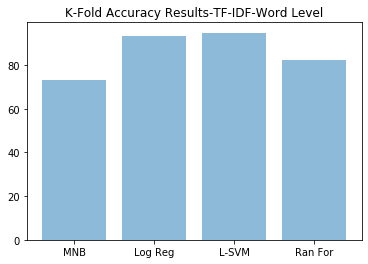

In [243]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('K-Fold Accuracy Results-TF-IDF-Word Level')

#### Accuracy Results - TF-IDF-Word Level Analysis 

In [244]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For')
y_pos = np.arange(len(objects))
performance = [float(score1*100),float(score2*100),float(scoreSVM*100),float(scoreRandomForrest*100)]

Text(0.5, 1.0, 'Accuracy Results-TF-IDF-Word Level')

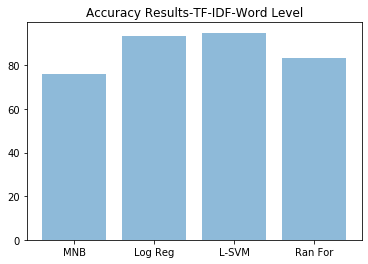

In [245]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Accuracy Results-TF-IDF-Word Level')

### K-Fold Cross-Validation Bigram-N-gram-Analysis

In [259]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For')
y_pos = np.arange(len(objects))
performance = [float(Accuracies_naive_bayes_classifier.mean()*100),float(Accuracies_logReg.mean()*100),float(Accuracies_scoreSVM_Bigrams2.mean()*100),float(Accuracies_RandomForrest_Bigram.mean()*100)]

Text(0.5, 1.0, 'K-Fold Accuracy Results-TF-IDF-Bigram Level')

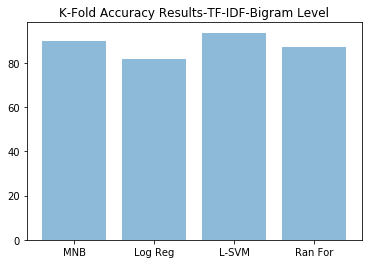

In [260]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('K-Fold Accuracy Results-TF-IDF-Bigram Level')

#### Accuracy Results - TF-IDF-Word Level Analysis 

In [261]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For')
y_pos = np.arange(len(objects))
performance = [float(scoreNB_Bigrams*100),float(score_LogisticReg_Bigram*100),float(scoreSVM_Bigrams*100),float(scoreRandomForrest_Bigram*100)]

Text(0.5, 1.0, 'Accuracy Results-TF-IDF-Bigram Level')

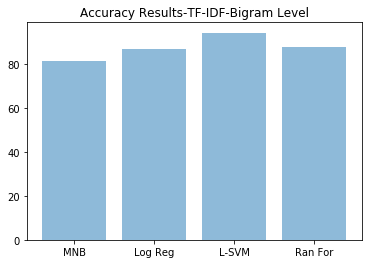

In [262]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Accuracy Results-TF-IDF-Bigram Level')

### K-Fold Cross-Validation - N-Gram Anlysis at Character Level

In [263]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For')
y_pos = np.arange(len(objects))
performance = [float(Accuracies_naive_bayes_classifier_char.mean()*100),float(Accuracies_logReg_Char_level.mean()*100),float(Accuracies_clf_svm_Char3.mean()*100),float(Accuracies_RandomForrest_Char.mean()*100)]

Text(0.5, 1.0, 'K-Fold Accuracy Results-TF-IDF-Character Level')

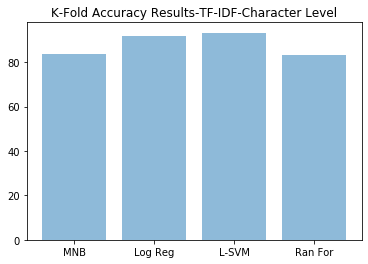

In [264]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('K-Fold Accuracy Results-TF-IDF-Character Level')

### Accuracy Results for TF-IDF at Character Level Analysis

In [265]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For')
y_pos = np.arange(len(objects))
performance = [float(scoreNB_Char_level*100),float(score_LogisticReg_Char*100),float(scoreSVM_Char*100),float(scoreRandomForrest_Char*100)]

Text(0.5, 1.0, 'Accuracy Results-TF-IDF-Character Level')

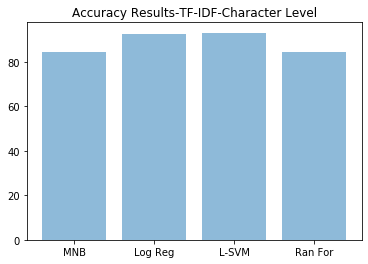

In [266]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Accuracy Results-TF-IDF-Character Level')

### Bag of Word K-Fold Cross Validation Word-Level

In [267]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For')
y_pos = np.arange(len(objects))
performance = [float(Accuracies_naive_bayes_classifier_cv.mean()*100),float(Accuracies_logReg_CV.mean()*100),float(Accuracies_clf_svm_CV4.mean()*100),float(Accuracies_RandomForrest_CV.mean()*100)]

Text(0.5, 1.0, 'K-Fold Accuracy Results-Bag-of-Words-Character Level')

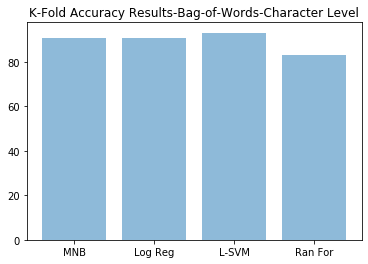

In [268]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('K-Fold Accuracy Results-Bag-of-Words-Character Level')

### Bag of Words Accuracy Word Level 

In [269]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For')
y_pos = np.arange(len(objects))
performance = [float(scoreNB_cv*100),float(score_LogisticRegression_cv*100),float(scoreSVM_CV*100),float(scoreRF_CV*100)]

Text(0.5, 1.0, 'Accuracy Results-Bag-of-Words-Character Level')

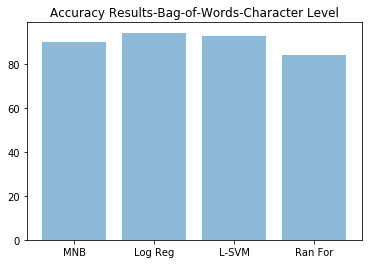

In [270]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Accuracy Results-Bag-of-Words-Character Level')

### K-Fold Cross-Validation Bag of Words Bigram Level

In [271]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For')
y_pos = np.arange(len(objects))
performance = [float(Accuracies_naive_bayes_classifier.mean()*100),float(Accuracies_logReg_CV.mean()*100),float(Accuracies_clf_svmCV5.mean()*100),float(Accuracies_RandomForrestCV.mean()*100)]

Text(0.5, 1.0, 'K-Fold Accuracy Results-Bag-of-Words-Bigram Level')

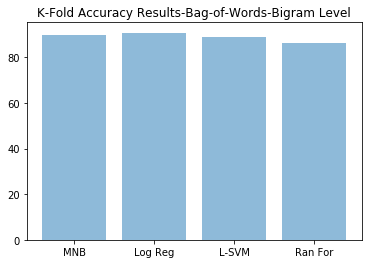

In [272]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('K-Fold Accuracy Results-Bag-of-Words-Bigram Level')

### Accuracy Bag of Words Bigram Level 

In [273]:
objects = ('MNB', 'Log Reg', 'L-SVM', 'Ran For')
y_pos = np.arange(len(objects))
performance = [float(scoreNB_cv_char*100),float(score_LogisticRegressionCV*100),float(scoreSVM_CVChar*100),float(scoreRFCV_Bigram*100)]

Text(0.5, 1.0, 'Accuracy Results-Bag-of-Words-Bigram Level')

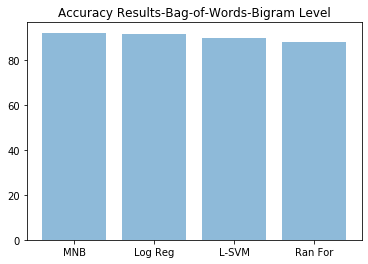

In [274]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Accuracy Results-Bag-of-Words-Bigram Level')

### K-Fold Cross Validation Bag of Words Character Level

In [281]:
objects = ('MNB', 'Log Reg','Ran For')
y_pos = np.arange(len(objects))
performance = [float(Accuracies_naive_bayes_classifier_CV_Char.mean()*100),float(Accuracies_logReg_CV_Char.mean()*100),float(Accuracies_RandomForrestCV_Char.mean()*100)]

Text(0.5, 1.0, 'K-Fold Accuracy Results-Bag-of-Words-Character Level')

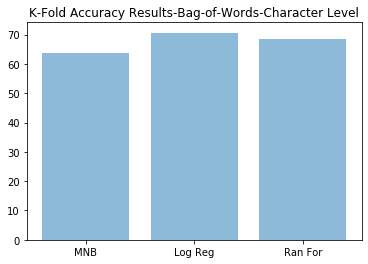

In [282]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('K-Fold Accuracy Results-Bag-of-Words-Character Level')

### Accuracy Score Bag of Words Character Level

In [283]:
objects = ('MNB', 'Log Reg','Ran For')
y_pos = np.arange(len(objects))
performance = [float(score_NB_cv_char*100),float(score_LogisticRegressionCV_Char*100),float(scoreRFCV_Char*100)]

Text(0.5, 1.0, 'Accuracy Results-Bag-of-Words-Character Level')

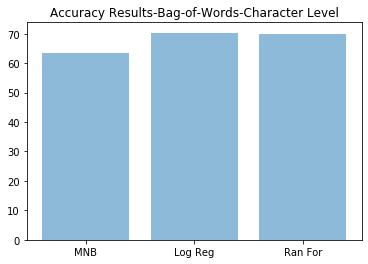

In [284]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Accuracy Results-Bag-of-Words-Character Level')

### Visulisation of Ensemble Results

In [255]:
x_Coords = [1,2,3,4,5,6,7,8,9,10]
y_Coords = [cv_result[0], cv_result[1], cv_result[2], cv_result[3], cv_result[4],
           cv_result[5], cv_result[6], cv_result[7], cv_result[8], cv_result[9]]

y1_Coords = [result[0],result[1],result[2],result[3],result[4],
            result[5],result[6],result[7],result[8],result[9]]

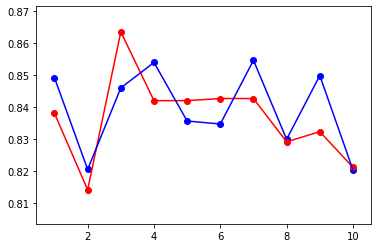

In [258]:
ax = plt.gca()
ax.scatter(x_Coords, y_Coords, color="b")
ax.scatter(x_Coords, y1_Coords, color="r")
ax.plot(x_Coords, y1_Coords, color="r")
ax.plot(x_Coords, y_Coords, color="b")